# Prediction of doctors prescribing dicisions


# Contents: <a class="anchor" id="contents"></a>

## [Introduction](#intro)

## 1. [Data](#import)

#### 1.1. [Library import, references and data loading](#import)
#### 1.2. [Preprocessing](#preprocessing)

## 2. [Fast analysis](#fanalysis)

## 3. [Feature engineering & deep analysis](#fe)

#### 3.2. [Feature engineering ](#fe)

#### 3.2. [Stat-analysis](#stat_a)

## 4. [The goal & feature selection](#goal-fs)


## 5. [Quality metrics](#quality-metrics)

## 7. [Basic Models](#basic_models)

#### 7.1. [ Logistic regression](#Log)
#### 7.2. [LinearSVC](#LinearSVC)
#### 7.3. [kNN (K-Nearest Neighbors)](#kNN)
#### 7.4. [DicisionTreeClassifier](#dtc)
#### 7.5. [Neural Network](#net)


## 8. [Ensemble and hybrid methods](#ensembles)

#### 8.1. [RandomForestClassifier](#rfc)
#### 8.2. [Bagging ](#stack)
#### 8.3 [Blending](#blending)
#### 8.4. [Stacking](#stack)

# Introduction <a class="anchor" id="intro"></a>
[back to contents](#contents)

    Medical facilities are dealing with a lot of patients and with the implementation of E-prescriptions, they can store and analyze their data easier. There is a lot of patients and doctors which means a lot of data. U.S. Centers for Medicare and Medicaid Services (CMS) released a dataset of 239,930 doctors from different regions, specialties, and their prescribing history. The dataset provides information on prescription drugs prescribed by individual physicians and other health care providers. And what do do with that data? With the help of machine learning, we can identify some patterns/connections between data that are hidden in the dataset. This was also the reason for releasing the CMS dataset to the public.

    There were a lot of articles written on a similar topic. As an example, we consider mining electronic health record data (EHR) with doctor‚Äôs medicine prescription. Here researchers use multi-task neural network approach to learn pattern of multiple correlated antidiabetic agents in blood glucose control and antihypertensive drugs in blood pressure control scenarios. The result demonstrated that for single drug prescription, multi-task learning achieves 0.02 to 0.06. increases in AUC compared with logistic regression. In prescription pattern prediction, they achieved an accuracy increase of 0.05 in antidiabetic agent prediction, showing the efficacy of multi-task learning approach in learning doctor prescription patterns.[13] Second example of data analyzing it‚Äôs prediction whether the patient will have a myocardial infarction. Researchers had to learn statistical model to indicate which patients on Cox-2 inhibitors, such as VioxxTM and CelebrexTM, are at substantial risk for heart attack. Here were tried many different types of algorithms, and chose the best four methods ‚Äì Na√Øve Bayes, TAN(Transductive Adversarial Networks), Boosted Rules and SAYU-TAN (Score As You Use). They scored each candidate feature using area-under the ROC curve. All methods do good on this task. However, in table of average AUC-ROC SAYU dominates the proposition learners for false positive rates less than 0.75. Researchers found that using techniques from statistical relation model lead to improvements over both standard propositional learning techniques as well as relational learning techniques.[11] One more example investigation is prediction of medication non-adherence referring on French Health System‚Äôs reimbursement data. Here we consider different models of patient drug consumption in breast cancer treatments. Data is a sequence of events (hospitalizations and pharmacy transactions) with timestamps and a set of characteristics about the patient. Researchers compare the ability of four supervised learning algorithms -logistic regression, decision tree, gradient boosting, multilayer perceptron. Gradient boosting, compared to the two previous models, is harder to interpret. However, it focuses on weak learners and can offer a better prediction. AUCs are roughly 0.70 with Gradient Boosting having the best performances. A Cumulative Accuracy Profit curve (CAP or Lorenz curve) gives the second and third measures, indicating the ability of a model to accurately spot a patient at-risk. Gradient boosting and MLP have the best results but these "black box methods" are difficult to explain which might refrain their usages.[12]

    Based on the sidns from database with the help of machine learning techniques, I will determine which gender doctor belongs to. For implementation I used a programming language called Python. It offers a variety of different libraries which make machine learning and data analysis easier. I used a library called Pandas [6] for preprocessing, Seaborn [9] for plotting the graphs and Sklearn [10] for machine learning computation.

–æ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞—Ö –ø–æ–¥—Ä–æ–±–Ω–µ–µ:

### [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

* [–±–∞–∑–æ–≤—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ pandas](https://smysl.io/blog/pandas/)
* [—Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫ –Ω–∞ —Ä—É—Å—Å–∫–æ–º –ø–æ pandas](https://riptutorial.com/Download/pandas-ru.pdf)

### [matplotlib](https://matplotlib.org/3.1.1/users/index.html)

* [—Å–∞–º–æ—É—á–∏—Ç–µ–ª—å](https://pyprog.pro/mpl/mpl_install.html)
* [–æ—Ç–ª–∏—á–Ω–∞—è —Å—Ç–∞—Ç—å—è –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0)

# Lib import, references and data loading <a class="anchor" id="import"></a>
[back to contents](#contents)

### In this table of contents, our json file is read, and the various libraries are imported for further work with the database.

In [2]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statistics
from itertools import product
%matplotlib inline
from IPython.display import display, HTML, Image, Math

#### Read the file line by line, and save it to the `data` list

In [195]:
data = []
for line in open('roam_prescription_based_prediction.jsonl', 'r'):
    data.append(json.loads(line))     

#### Convert the dictionary using `json_normalize` to pandas.DataFrame

In [196]:
df = pd.io.json.json_normalize(data)
#df.head(2)

#### General table information:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239930 entries, 0 to 239929
Columns: 2405 entries, cms_prescription_counts.1ST TIER UNIFINE PENTIPS to provider_variables.years_practicing
dtypes: float64(2397), int64(3), object(5)
memory usage: 4.3+ GB


In [4]:
ndf = df.copy()

# Preprocessing <a class="anchor" id="preprocessing"></a>
[back to contents](#contents)

### As our data file contains 4.3 Gb, we need to compress the table so that we can work further. For now, delete the `data` variable to unload the memory. Here we will also do some data pre-processing, which in the future will allow us to work with this data.

#### Fill the empty `NaN` values with zeros

In [197]:
df = df.fillna(0)

#### Set the row indexes of the table `npi` - the number of the doctor

In [198]:
df = df.set_index('npi')
#df.head(2)

#### Transform the table structure, move to the beginning the last 7 columns (`cols [: - 7]`) and reduce the headers with the `new_cols` variable.

In [199]:
cols = df.columns.tolist()
cols = cols[-7:] + cols[:-7]
df = df[cols]

#### Assign the header table to `new_cols` which, using the` for n in cols: `loop, and the regular expression` re.sub (...) `, reduce the headings to the original ones, removing the prefixes that formed after normalization.

In [200]:
new_cols = []
for n in cols:
    if n.count('provider_variables.') == 1:
        n = re.sub('provider_variables.', '', n)
    if n.count('cms_prescription_counts.') == 1:
        n = re.sub('cms_prescription_counts.', '', n)
    new_cols.append(n)

In [201]:
df.columns = new_cols
#df.head(2)

In [216]:
df.shape

(239930, 2404)

#### Optimize the data on prescribed medications so that the table takes up less space.

In [202]:
float_df_1 = df[new_cols[7:1200]]
converted_int_1 = float_df_1.apply(pd.to_numeric,downcast='signed')
del float_df_1

In [203]:
float_df_2 = df[new_cols[1200:]]
converted_int_2 = float_df_2.apply(pd.to_numeric,downcast='signed')
del float_df_2

#### Let's create the table `drugs` which will contain the database of prescribed recipes.

In [204]:
drugs = pd.concat([converted_int_1,converted_int_2],axis=1)

In [205]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Columns: 2397 entries, 1ST TIER UNIFINE PENTIPS to ZYVOX
dtypes: int16(863), int8(1534)
memory usage: 747.8+ MB


#### Create the table `main_df` in which the first part of the table will be located, without medical preparations.

In [206]:
main_df = df[new_cols[:7]]

#### Using the `.info ()` and `.describe ()` methods, we display general table information

In [207]:
print(main_df.info())
main_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Data columns (total 7 columns):
brand_name_rx_count    239930 non-null int64
gender                 239930 non-null object
generic_rx_count       239930 non-null int64
region                 239930 non-null object
settlement_type        239930 non-null object
specialty              239930 non-null object
years_practicing       239930 non-null int64
dtypes: int64(3), object(4)
memory usage: 14.6+ MB
None


brand_name_rx_count  generic_rx_count  years_practicing
count        239930.000000     239930.000000     239930.000000
mean            176.264144        795.547047          6.241875
std             475.159281       1809.618284          1.649269
min               0.000000          0.000000          1.000000
25%               0.000000         36.000000          6.000000
50%              15.000000        145.000000          7.000000
75%             154.000000        750.000000          7.000000
max           30547.000000     101079.000000          8.000000

#### We have to convert categorical string data into `main_df` to numerical equivalents using the` get_dummies` method.
#### `gender`,` settlement_type` transform to the columns `male`,` urban`, where 1 is yes, 0 is no.
#### It is also possible to convert the `region` to 4 columns according to the number of unique values in the current column.

<a class="anchor" id="here2"></a>

In [208]:
male = pd.get_dummies(main_df['gender'])
urban = pd.get_dummies(main_df['settlement_type'])

# –ø–æ–∫–∞ –Ω–µ —É–≤–µ—Ä–µ–Ω, —á—Ç–æ –Ω—É–∂–Ω–æ –µ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–∞–≤–∞—Ç—å
# region =  pd.get_dummies(main_df['region'])

#### Rename the column "M" to "male"

In [209]:
male = male.rename(columns={"M": "male"})

#### Combine 4 tables into one (pd.concat) and delete the extra columns (main_df.drop).

In [210]:
main_df = pd.concat([main_df, male, urban], axis = 1)

In [211]:
main_df= main_df.drop(['non-urban','F', 'gender','settlement_type'], axis=1)

In [212]:
main_df.sample(5)

brand_name_rx_count  generic_rx_count   region         specialty  \
npi                                                                            
1922196674                    0                25  Midwest  General Practice   
1851352942                  347              1247    South         Neurology   
1831112960                   28               350    South   Sports Medicine   
1457323313                    0                26  Midwest  General Practice   
1316028046                    0                72  Midwest  General Practice   

            years_practicing  male  urban  
npi                                        
1922196674                 7     1      0  
1851352942                 7     1      0  
1831112960                 7     0      0  
1457323313                 7     1      0  
1316028046                 7     1      0

In [213]:
full_df = pd.concat([main_df, drugs], axis = 1)

In [215]:
full_df.shape

(239930, 2404)

In [218]:
full_df.to_csv('full_df.csv')

In [219]:
new_f_df = pd.read_csv('full_df.csv')

In [220]:
new_f_df.head(2)

npi  brand_name_rx_count  generic_rx_count region         specialty  \
0  1295763035                  384              2287  South        Nephrology   
1  1992715205                    0               103  South  General Practice   

   years_practicing  male  urban  1ST TIER UNIFINE PENTIPS  ABACAVIR  ...  \
0                 7     1      0                         0         0  ...   
1                 7     1      0                         0         0  ...   

   ZYFLO  ZYFLO CR  ZYLET  ZYLOPRIM  ZYMAXID  ZYPREXA  ZYPREXA RELPREVV  \
0      0         0      0         0        0        0                 0   
1      0         0      0         0        0        0                 0   

   ZYPREXA ZYDIS  ZYTIGA  ZYVOX  
0              0       0      0  
1              0       0      0  

[2 rows x 2405 columns]

# Fast analysis <a class="anchor" id="fanalysis"></a>
[back to contents](#contents)

### In this content of table we analyse data with using different statistical values and graphs. Graphical representation will help us to understand the interactions between attributes and discard the information that we don‚Äôt need.

#### Once again, the general information about the `.info ()` table is displayed, this time add the `all` argument to the` .describe (include = 'all') `function to find out the number of unique and most popular values for [data type `object`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [24]:
print(main_df.info())
main_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 239930 entries, 1295763035 to 1144252818
Data columns (total 7 columns):
brand_name_rx_count    239930 non-null int64
generic_rx_count       239930 non-null int64
region                 239930 non-null object
specialty              239930 non-null object
years_practicing       239930 non-null int64
male                   239930 non-null uint8
urban                  239930 non-null uint8
dtypes: int64(3), object(2), uint8(2)
memory usage: 11.4+ MB
None


brand_name_rx_count  generic_rx_count  region         specialty  \
count         239930.000000     239930.000000  239930            239930   
unique                  NaN               NaN       4               282   
top                     NaN               NaN   South  General Practice   
freq                    NaN               NaN   80562             47836   
mean             176.264144        795.547047     NaN               NaN   
std              475.159281       1809.618284     NaN               NaN   
min                0.000000          0.000000     NaN               NaN   
25%                0.000000         36.000000     NaN               NaN   
50%               15.000000        145.000000     NaN               NaN   
75%              154.000000        750.000000     NaN               NaN   
max            30547.000000     101079.000000     NaN               NaN   

        years_practicing           male          urban  
count      239930.000000  239930.000000  239930.000000  
unique               NaN            NaN            NaN  
top                  NaN            NaN            NaN  
freq                 NaN            NaN            NaN  
mean            6.241875       0.623753       0.365357  
std             1.649269       0.484444       0.481531  
min             1.000000       0.000000       0.000000  
25%             6.000000       0.000000       0.000000  
50%             7.000000       1.000000       0.000000  
75%             7.000000       1.000000       1.000000  
max             8.000000       1.000000       1.000000

#### We can see:

<font color=red> 
    
* mean value `brand_name_rx_count` and `generic_rx_count` 176 and 795 respectively;

* **quartile:**
* `25%` the smallest values of column `generic_rx_count` have median score 36;
* similarly, `75% of the values of the column` brand_name_rx_count` have a score of 175 or lower;
* `25%` of the `years_practicing` column values have a score of 6 or less, and mean of 6.24;

* 62% - male;
* 36% percent practice outside the city;

* there are 4 options for the `region` column
* there are 282 `specialty`, most often (47,836 times) occurs` General Practice`

</font><a class="anchor" id="1!"></a>

[–ø–æ—á–µ–º—É –≤–∞–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ?](https://ru.coursera.org/lecture/znakomstvo-r-bazovaya-statistika/miediana-i-kvantili-Tj9Lf)

#### Let's look at the distribution of quantitative traits. The chart below shows the distribution of practicing years for doctors. From this distribution we can see that in our database most of doctors who practice from 6 to 8 years (most 7 years).

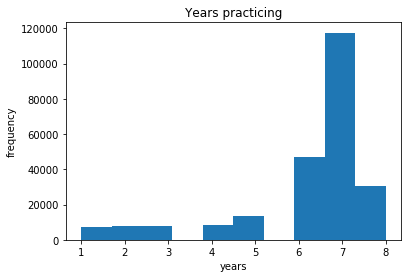

In [119]:
fig = plt.hist(main_df.years_practicing)
plt.title('Years practicing')
plt.xlabel("years")
plt.ylabel("frequency")

plt.savefig('years_practicing_hist.tiff', transparent=False, dpi=300, bbox_inches="tight")

#### Let's graphically show the percentage of doctors by gender. In this case, 1 is a male and 0 is a female. In our database, the number of male doctors exceeds the number of female doctors.

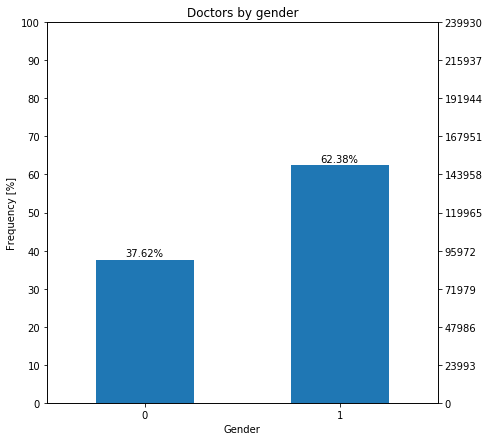

In [120]:
# Percent doctors by gender
plt.figure(figsize=(7,7))
plt.title('Doctors by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency [%]')

ax = (main_df.male.value_counts()/len(main_df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
plt.savefig('doctors_by_gender.tiff', transparent=False, dpi=300, bbox_inches="tight")

#### Next boxplot presents years practicing by gender and region. The boxplot extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.
#### At the boxplot we can see that mean value of years practicing for each doctor usually is 6 years, most of female doctors from South and Midwest have 4 years practicing, while doctors from West and Northeast have 5 years. The quartile values are ranged from 1 to 8 - for first two regions, and rom 2 to 8 - for two other.

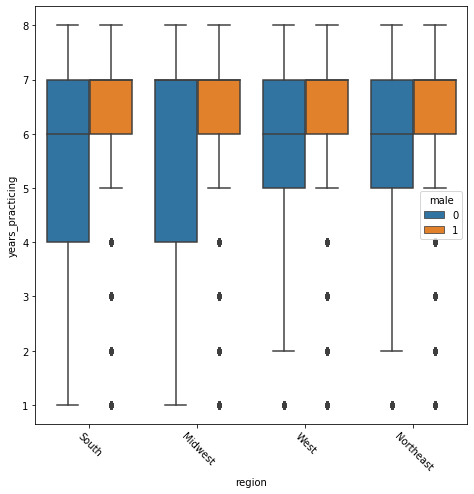

In [45]:
#Years practicing by region&gender
plt.figure(figsize=(15,10))
sns.boxplot(data=main_df,
            y='years_practicing',
            x='region',
            hue='male') 
plt.xticks(rotation=-45) 
plt.gcf().subplots_adjust(left=0.50, bottom = 0.30)
plt.savefig('years_practicing_by_region_gender.tiff', format='tiff', dpi=300)


<font color = red>–≤ —á–µ–º —Å—É—Ç—å –≥—Ä–∞—Ñ–∏–∫–∞</font>
(https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)<a class="anchor" id="2!"></a>


<Figure size 720x1440 with 0 Axes>

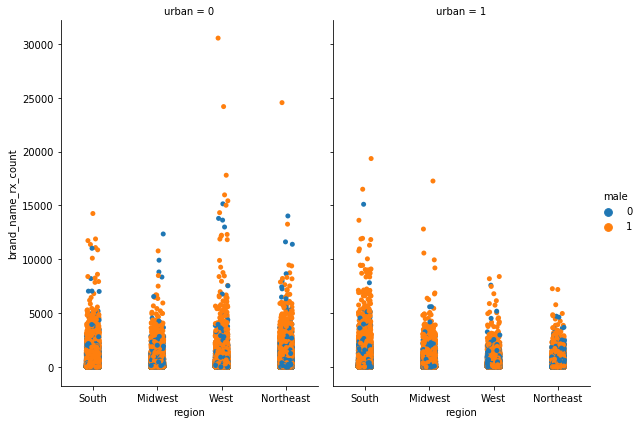

In [42]:
plt.figure(figsize=(10,20))
sns.catplot(x="region", y="brand_name_rx_count",
            hue="male", col="urban",
            data=main_df, kind="strip",
            height=6, aspect=.7)

plt.savefig('brand_name_rx_count_fast.tiff', format='tiff', transparent=False, dpi=300, bbox_inches="tight")

<Figure size 720x1440 with 0 Axes>

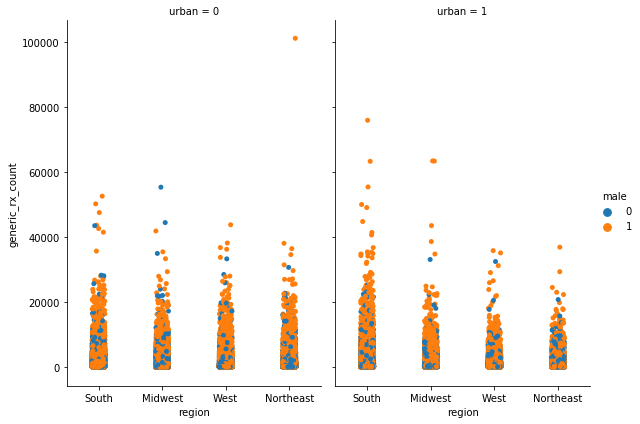

In [43]:
plt.figure(figsize=(10,20))
sns.catplot(x="region", y="generic_rx_count",
            hue="male", col="urban",
            data=main_df, kind="strip",
            height=6, aspect=.7)

plt.savefig('generic_rx_count_fast.tiff', format='tiff', transparent=False, dpi=300, bbox_inches="tight")

–í—ã–¥–µ–ª—è—é —Ä—è–¥ —Ç–æ—á–µ–∫, –∫–æ—Ç–æ—Ä—ã–µ —Å–∏–ª—å–Ω–æ –≤—ã–±–∏–≤–∞—é—Ç—Å—è –æ—Ç –æ–±—â–µ–π –≥—Ä—É–ø–ø—ã, –≤ –æ—Å–Ω–æ–≤–Ω–ª–º —ç—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤—Ä–∞—á–µ–π-–º—É–∂—á–∏–Ω.

### –ò–∑—É—á–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π –≤—Ä–∞—á–µ–π –≤ –Ω–∞—à–µ–π —Ç–∞–±–ª–∏—Ü–µ.

<a class="anchor" id="here"></a>

–¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –∫–æ–ª–æ–Ω–∫—É `specialty` –≤ —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –¥–ª—è —ç—Ç–æ–≥–æ —Å–Ω–∞—á–∞–ª–∞ –∫–æ–ø–∏—Ä–µ–º `main_df` –≤ `pairplot_df`. –ü–æ—Å–ª–µ –ø–µ—Ä–µ–≤–æ–∂—É —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —á–∏—Å–ª–æ–≤—ã–µ:

In [46]:
pairplot_df = main_df.copy()

In [47]:
specialty_dict = dict(enumerate(pairplot_df['specialty'].astype('category').cat.categories))
pairplot_df['specialty']  = pairplot_df['specialty'].astype('category')
pairplot_df['specialty'] = pairplot_df['specialty'].cat.codes

–Ω–æ–º–µ—Ä–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π —Å–æ—Ö—Ä–∞–Ω—è—é –≤ —Å–ª–æ–≤–∞—Ä—å `specialty_dict`

In [48]:
specialty_dict

{0: 'Acute Care',
 1: 'Addiction (Substance Use Disorder)',
 2: 'Addiction Medicine',
 3: 'Addiction Psychiatry',
 4: 'Administrator',
 5: 'Adolescent Medicine',
 6: 'Adolescent and Children Mental Health',
 7: 'Adult Development & Aging',
 8: 'Adult Health',
 9: 'Adult Medicine',
 10: 'Adult Mental Health',
 11: 'Adult Reconstructive Orthopaedic Surgery',
 12: 'Aerospace Medicine',
 13: 'Allergy',
 14: 'Allergy & Immunology',
 15: 'Ambulatory Care',
 16: 'Ambulatory Surgical',
 17: 'Anatomic Pathology',
 18: 'Anatomic Pathology & Clinical Pathology',
 19: 'Assistive Technology Practitioner',
 20: 'Athletic Trainer',
 21: 'Behavioral Neurology & Neuropsychiatry',
 22: 'Blood Banking & Transfusion Medicine',
 23: 'Body Imaging',
 24: 'Cardiac Rehabilitation',
 25: 'Cardiovascular Disease',
 26: 'Cardiovascular Invasive Specialist',
 27: 'Cardiovascular-Interventional Technology',
 28: 'Case Management',
 29: 'Child & Adolescent Psychiatry',
 30: 'Child Abuse Pediatrics',
 31: 'Children'

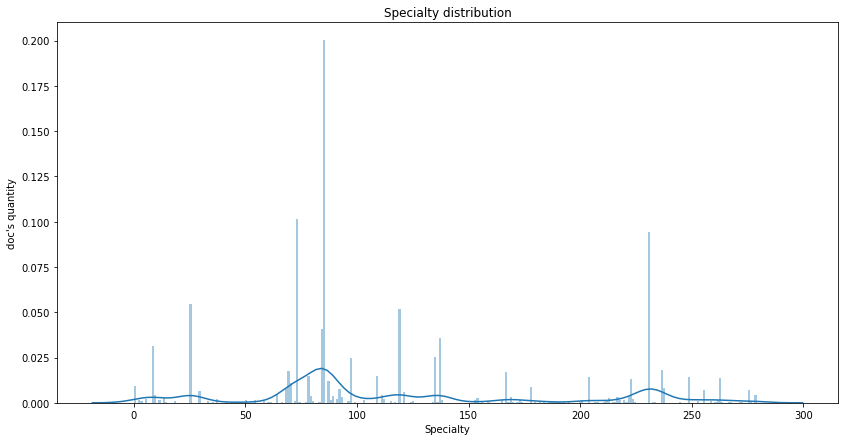

In [49]:
plt.figure(figsize=(14,7))
fig = sns.distplot(pairplot_df['specialty'], bins=282 )
plt.title('Specialty distribution')
plt.xlabel("Specialty")
plt.ylabel("doc's quantity")

plt.savefig('specialty_distribution.tiff', transparent=False, dpi=300, bbox_inches="tight")

### –≤–∏–¥–∏–º –ø–∏–∫–∏

(70, 90)

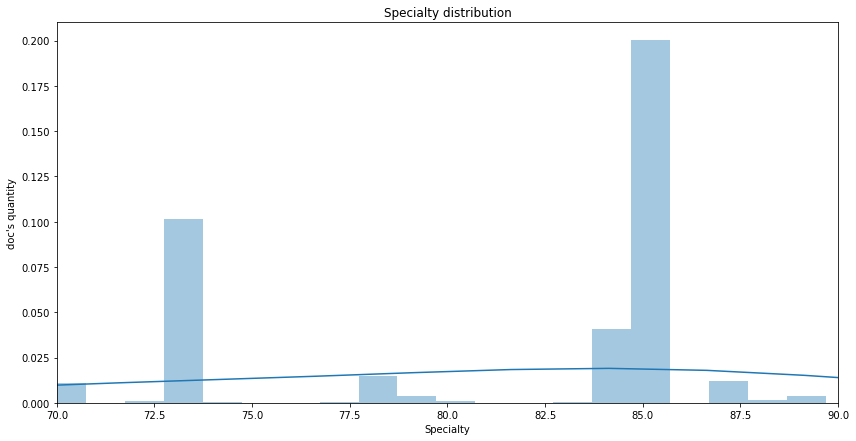

In [50]:
# –µ—Å–ª–∏ –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–æ–º–µ—Ä —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, –ø–æ–ª—å–∑—É—é—Å—å xlim

plt.figure(figsize=(14,7))
fig = sns.distplot(pairplot_df['specialty'], bins=282)
plt.title('Specialty distribution')
plt.xlabel("Specialty")
plt.ylabel("doc's quantity")
# ------------------
plt.xlim(70,90)

–í–∏–∂—É, —á—Ç–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–¥ –Ω–æ–º–µ—Ä–æ–º 73 –∏ 85 –∏–º–µ—é—Ç –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ:

In [57]:
specialty_dict[73], specialty_dict[85]

('Family', 'General Practice', 'Gastroenterology')

In [62]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ

main_df.specialty.value_counts()[:10]

General Practice          47836
Family                    24230
Psychiatry                22530
Cardiovascular Disease    13091
Medical                   12445
Gastroenterology           9695
Neurology                  8501
Adult Health               7444
Nephrology                 5997
Hematology & Oncology      5852
Name: specialty, dtype: int64

In [69]:
main_df.specialty.value_counts()[:5].values.sum()/len(main_df)

0.5006960363439337

#### —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —É –Ω–∞—Å 5 —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 50% –≤—ã–±–æ—Ä–∫–∏

### –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:

#### Let's plot a pair correlation chart of 3 indicators using the `seaborn` library (imported as` sns`) and its `.pairplot ()` method. Arguments methods (given in brackets):
* `main_df` - our data;
* `vars` - columns that we want to visualize;
* `kind = reg` - add a red regression line to the chart to indicate a trend;
* `plot_kws` - a dictionary in which the visualization settings, colors and transparency of the points are indicated.

####  Here we do not see the real picture, but we understand that doctors prescribe up to 3 thousand brand drugs and 10 thousand generics.

In [242]:
pairplot_df.head(2)

brand_name_rx_count  generic_rx_count region  specialty  \
npi                                                                   
1295763035                  384              2287  South        135   
1992715205                    0               103  South         85   

            years_practicing  male  urban  
npi                                        
1295763035                 7     1      0  
1992715205                 7     1      0

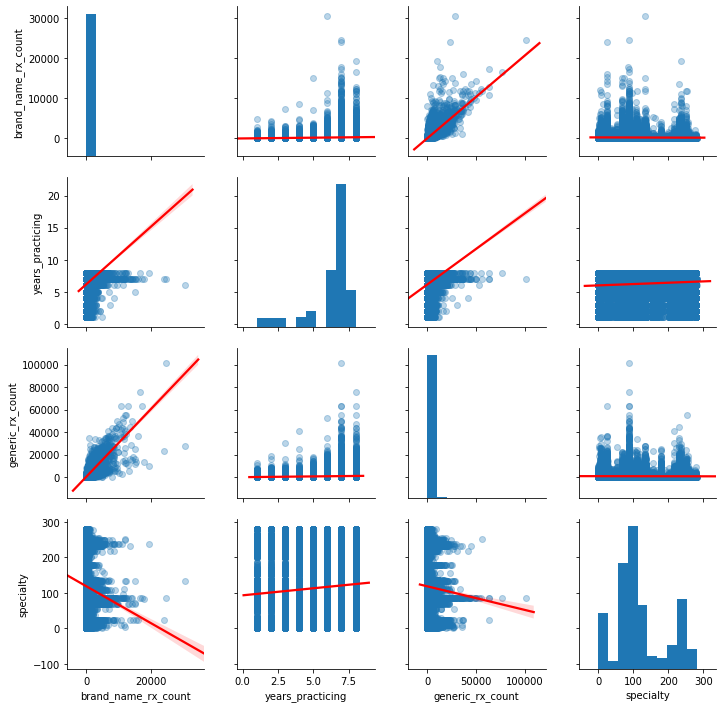

In [245]:
sns.pairplot(pairplot_df, vars=['brand_name_rx_count',
                                'years_practicing',
                                'generic_rx_count',
                                'specialty'],
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

–ï—Å—Ç—å —É—Å—Ç–æ–π—á–∏–≤—ã–π —Ç—Ä–µ–Ω–¥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ª–µ—Ç –ø—Ä–∞–∫—Ç–∏–∫–∏ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤, –∏ –æ–±—Ä–∞—Ç–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ —Å –Ω–æ–º–µ—Ä–æ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏.

No handles with labels found to put in legend.


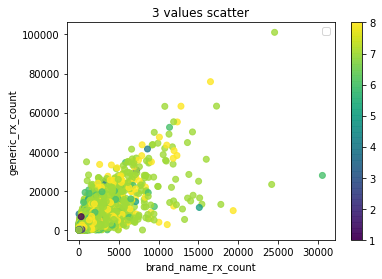

In [246]:
fig = plt.scatter(x=main_df.brand_name_rx_count, y=main_df.generic_rx_count, c=main_df.years_practicing, alpha=0.8)
plt.title('3 values scatter')
plt.xlabel("brand_name_rx_count")
plt.ylabel("generic_rx_count")
plt.colorbar(fig)
plt.savefig('3_values_scatter.tiff', transparent=False, dpi=300, bbox_inches="tight")

### –ü–æ—Å–ª–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–º–µ—Ç–∏—å —á—Ç–æ –≤–∏–¥–∏–º –≤—ã–±–æ—Ä—Å—ã (–¥–∞–Ω–Ω—ã–µ –∫–æ—Ç–æ—Ä—ã–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∏ –º–æ–≥—É—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏).

# Feature engineering <a class="anchor" id="fe"></a>
[back to contents](#contents)

#### I want to teach a model to predict the gender of a doctor. Now we will work with `main_df`, to add new attributes.

#### Create a new attribute (column) `bn_rx_proportion`, which will evaluate the relationship between the types of prescribed drugs. This proportion shows how many times `brand_name_rx_count` exceeds `generic_rx_count ` if the it is greater than another one. Or how many times it is less, if vice versa.

In [109]:
main_df['bn_rx_proportion'] = main_df['brand_name_rx_count'] / main_df['generic_rx_count']

#### As a result of dividing by `0`, the values of` inf` (infinity) were added, we replace these values with `0`. 

In [110]:
main_df = main_df.replace([np.inf, -np.inf], 0)

In [112]:
main_df.describe(include='all')

brand_name_rx_count  generic_rx_count  region         specialty  \
count         239930.000000     239930.000000  239930            239930   
unique                  NaN               NaN       4               282   
top                     NaN               NaN   South  General Practice   
freq                    NaN               NaN   80562             47836   
mean             176.264144        795.547047     NaN               NaN   
std              475.159281       1809.618284     NaN               NaN   
min                0.000000          0.000000     NaN               NaN   
25%                0.000000         36.000000     NaN               NaN   
50%               15.000000        145.000000     NaN               NaN   
75%              154.000000        750.000000     NaN               NaN   
max            30547.000000     101079.000000     NaN               NaN   

        years_practicing           male          urban  bn_rx_proportion  
count      239930.000000  239930.000000  239930.000000     239930.000000  
unique               NaN            NaN            NaN               NaN  
top                  NaN            NaN            NaN               NaN  
freq                 NaN            NaN            NaN               NaN  
mean            6.241875       0.623753       0.365357          0.218467  
std             1.649269       0.484444       0.481531          0.696692  
min             1.000000       0.000000       0.000000          0.000000  
25%             6.000000       0.000000       0.000000          0.000000  
50%             7.000000       1.000000       0.000000          0.065728  
75%             7.000000       1.000000       1.000000          0.204597  
max             8.000000       1.000000       1.000000        170.068966

#### Create a column to calculate the number of different drugs prescribed by doctors in the table `drugs`. To do this, use the construction with the unnamed function [`lambda`](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7).

In [104]:
# —Å–æ–∑–¥–∞—é —Å—Ç–æ–ª–±–µ—Ü   –∏–∑ –æ–±—â–µ–≥–æ –∫–æ–ª-–≤–∞ (2397)   –≤—ã—á–∏—Ç–∞—é –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã —Å 0
drugs['drugs_variety'] = 2397 - drugs.apply(lambda x: x.isin([0]).sum(), axis='columns')

#### Combine `main_df` and` drugs` into a table similar to the original one, but with new features `bn_rx_proportion` and` drugs_variety`.

In [113]:
main_df = pd.concat([main_df, drugs.drugs_variety],axis=1)

In [114]:
main_df.head(2)

brand_name_rx_count  generic_rx_count region         specialty  \
npi                                                                          
1295763035                  384              2287  South        Nephrology   
1992715205                    0               103  South  General Practice   

            years_practicing  male  urban  bn_rx_proportion  drugs_variety  
npi                                                                         
1295763035                 7     1      0          0.167906             68  
1992715205                 7     1      0          0.000000              3

#### It is also possible to convert the `region` to 4 columns according to the number of unique values in the current column.

# –µ—Å—Ç—å 2 –≤–∞—Ä–∏–∞–Ω—Ç–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, –º—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –æ–±–æ–∏–º–∏: —Å–æ–∑–¥–∞–¥–∏–º 2 –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏–µ —Ç–∞–±–ª–∏—Ü—ã:

In [136]:
cat_df = main_df.copy()
region_dict = dict(enumerate(cat_df['region'].astype('category').cat.categories))
cat_df['region']  = cat_df['region'].astype('category')
cat_df['region'] = cat_df['region'].cat.codes
cat_df.head(2)

brand_name_rx_count  generic_rx_count  region         specialty  \
npi                                                                           
1295763035                  384              2287       2        Nephrology   
1992715205                    0               103       2  General Practice   

            years_practicing  male  urban  bn_rx_proportion  drugs_variety  
npi                                                                         
1295763035                 7     1      0          0.167906             68  
1992715205                 7     1      0          0.000000              3

In [117]:
regions = pd.get_dummies(main_df['region'])
W_df = pd.concat([main_df, regions], axis = 1)
W_df= W_df.drop('region', axis=1)
W_df.head(2)

brand_name_rx_count  generic_rx_count         specialty  \
npi                                                                   
1295763035                  384              2287        Nephrology   
1992715205                    0               103  General Practice   

            years_practicing  male  urban  bn_rx_proportion  drugs_variety  \
npi                                                                          
1295763035                 7     1      0          0.167906             68   
1992715205                 7     1      0          0.000000              3   

            Midwest  Northeast  South  West  
npi                                          
1295763035        0          0      1     0  
1992715205        0          0      1     0

### –í—ã–¥–µ–ª–∏–º –æ—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—è—Ö –≤—Ä–∞—á–µ–π, –ø–æ–ø—Ä–æ–±—É–µ–º —Å–æ–∑–¥–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –í—Å–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –≤—ã–ø–æ–ª–Ω—è—é —Å —Ç–∞–±–ª–∏—Ü–µ–π `W_df`:

In [119]:
W_df.specialty.value_counts().head(10)

General Practice          47836
Family                    24230
Psychiatry                22530
Cardiovascular Disease    13091
Medical                   12445
Gastroenterology           9695
Neurology                  8501
Adult Health               7444
Nephrology                 5997
Hematology & Oncology      5852
Name: specialty, dtype: int64

In [120]:
top_spec= list(W_df.specialty.value_counts().head(5).index)
top_spec

['General Practice',
 'Family',
 'Psychiatry',
 'Cardiovascular Disease',
 'Medical']

In [121]:
W_df[W_df.specialty.isin(top_spec)]['male'].value_counts()

1    71479
0    48653
Name: male, dtype: int64

In [122]:
71479 / len(W_df[W_df.specialty.isin(top_spec)])

0.5950038291212999

–í–∏–¥–∏–º, —á—Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω —Å—Ä–µ–¥–∏ **—Ç–æ–ø 5** —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π, –±–∏–∑–∫–æ –∫ –æ–±—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –ù–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≥–∏–ø–æ—Ç–µ–∑–∞, —á—Ç–æ –æ—Ç —Å–ø–µ—Ü–∞–ª—å–Ω–æ—Å—Ç–∏ –∫ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–æ–ª—è –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω –º–æ–∂–µ—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è.

In [73]:
W_df[W_df.specialty.str.contains('Endo', flags=re.IGNORECASE, regex=True)].specialty.value_counts()

Endocrinology, Diabetes & Metabolism      4136
Endodontics                               2664
Reproductive Endocrinology                 143
Pediatric Endocrinology                    133
Endoscopy                                    1
Reproductive Endocrinology/Infertility       1
Name: specialty, dtype: int64

In [123]:
W_df[W_df.specialty.str.contains('Geriat', flags=re.IGNORECASE, regex=True)].specialty.value_counts()

Geriatric Medicine      2889
Geriatric Psychiatry     339
Geriatric                 10
Name: specialty, dtype: int64

–î–æ–±–∞–≤–∏–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π, —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏—é `specialty_classify`, –∫–æ—Ç–æ—Ä–∞—è —É–ø—Ä–æ—Å—Ç–∏—Ç —Ä—É—á–Ω—É—é —Ä–∞–±–æ—Ç—É:

In [125]:
def specialty_classify(df, spec, my_class):
    df.loc[df['specialty'].str.contains(spec, flags=re.IGNORECASE, regex=True), str(my_class)] = 1

–§—É–Ω–∫—Ü–∏—è –¥–æ–±–∞–≤–ª—è–µ—Ç –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–ª—É—á–∞–µ—Ç –Ω–∞–∑–≤–∞–Ω–∏–µ `my_class`. `my_class` —Å–æ–¥–µ—Ä–∂–∏—Ç `1` –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ `specialty` –∏—Å—Ö–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã, —Å–æ–¥–µ—Ä–∂–∏—Ç —Å—Ç—Ä–æ–∫—É `spec`.

–ø—Ä–∏–º–µ—Ä:

–æ—Ç—Ä–∞–±–æ—Ç–∞–≤ –∫–æ–¥ `specialty_classify(main_df, 'Nephro', 'nephrology')` –ø–æ–ª—É—á–∏–º:

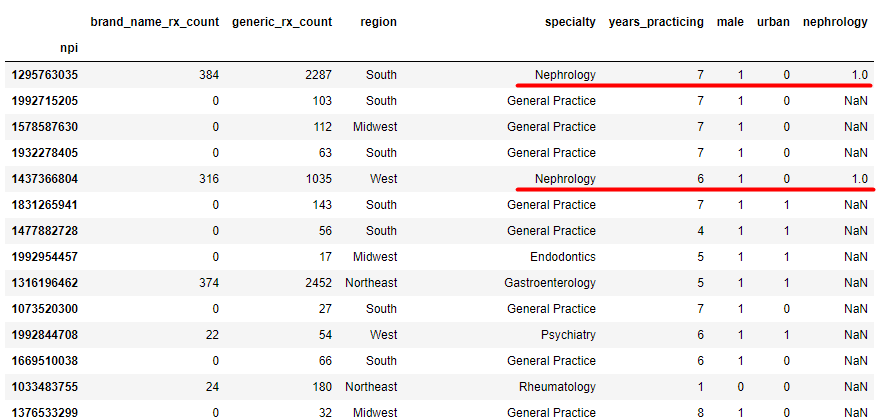

In [126]:
Image(filename='spec_classify_func.png')

–û–±–æ–±—â–µ–Ω–Ω–æ –≤—ã—ã–¥–µ–ª–∏–º –Ω–∞–∏–±–æ–ª–µ–µ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω—ã–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, –∏ —Å–æ–±–µ—Ä–µ–º –∏—Ö –≤ —Å–ª–æ–≤–∞—Ä—å, —á—Ç–æ–±—ã –ø–æ–∑–∂–µ –æ—Ç—Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞—à—É —Ñ—É–Ω–∫—Ü–∏—é –≤ —Ü–∏–∫–ª–µ. –ö–∞—Ç–µ–≥–æ—Ä–∏–∑–∏—Ä—É—é –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π —Å–∞–º—ã—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π, —á—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å –∫–∞–∂–¥–æ–º—É –≤—Ä–∞—á—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ø—Ä–∏–∑–Ω–∞–∫.

–∫–∞–∫ —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è —Å–ª–æ–≤–∞—Ä—å,–Ω–∞ –ø—Ä–∏–º–µ—Ä–µ:

`'gynecol|female|women' : 'female_doctor'`

* —Å–ª–µ–≤–∞ –æ—Ç –¥–≤–æ–µ—Ç–æ—á–∏—è, —á–µ—Ä–µ–∑ –∑–Ω–∞–∫ `|` –∏–¥–µ—Ç –ø–µ—Ä–µ—á–µ—Å–ª–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –∏–ª–∏ —á–∞—Å—Ç–µ–π —Å–ª–æ–≤ - —ç—Ç–æ –∫–ª—é—á–∏ —Å–ª–æ–≤–∞—Ä—è,

* —Å–ø—Ä–∞–≤–∞ —Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∫–ª—é—á—É —Å–ª–æ–≤—Ä—è - –∑–Ω–∞—á–µ–Ω–∏—è.

[–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è](https://docs.python.org/3/library/stdtypes.html#dict)

In [127]:
# –∑–¥–µ—Å—å –≤—ã –º–æ–∂–µ—Ç–µ —Å–¥–µ–ª–∞—Ç—å –≤—ã–±–æ—Ä–∫—É –±–æ–ª–µ–µ —Ä–∞–∑—É–º–Ω–æ–π

spec_dict = {'gynecol|female|women' : 'female_doctor',
             'Practice|Family':'practice',
             'Surg':'Surgery',
             'Endocr':'Endocrinology',
             'Urolog':'urology',
             'dent' : 'dentistry',
             'Pain' : 'paint_medicine',
             'Pediatr|Child' : 'pediatry',
             'Immuno': 'immunology',
             'Radio':'Radiology',
             'sport':'sport_medicine',
             'Gastroe':'Gastroenterology',
             'Infect':'Infectious',
             'Rheuma':'Rheumatology',
             'Cardio':'Cardiology',
             'Psyc':'Psychiatry',
             'Onco':'Oncology',
             'Nephro':'Nephrology',
             'Pulmon':'Pulmonology',
             'Geriat':'Geriatric',
             'Technol':'Technology'}

In [131]:
len(spec_dict)

21

In [128]:
for k,v in spec_dict.items():
    specialty_classify(W_df, k, v)

In [129]:
W_df.sample(5)

brand_name_rx_count  generic_rx_count         specialty  \
npi                                                                   
1215151444                    0                71    Prosthodontics   
1316044878                  362              1471        Nephrology   
1063535938                   45                29  General Practice   
1730270588                    0                13  General Practice   
1194774034                  286              1785     Pain Medicine   

            years_practicing  male  urban  bn_rx_proportion  drugs_variety  \
npi                                                                          
1215151444                 6     0      0          0.000000              3   
1316044878                 7     1      1          0.246091             34   
1063535938                 6     1      0          1.551724              4   
1730270588                 7     1      0          0.000000              1   
1194774034                 7     1      0          0.160224             34   

            Midwest  Northeast  ...  Gastroenterology  Infectious  \
npi                             ...                                 
1215151444        0          0  ...               NaN         NaN   
1316044878        0          0  ...               NaN         NaN   
1063535938        0          0  ...               NaN         NaN   
1730270588        0          0  ...               NaN         NaN   
1194774034        0          0  ...               NaN         NaN   

            Rheumatology  Cardiology  Psychiatry  Oncology  Nephrology  \
npi                                                                      
1215151444           NaN         NaN         NaN       NaN         NaN   
1316044878           NaN         NaN         NaN       NaN         1.0   
1063535938           NaN         NaN         NaN       NaN         NaN   
1730270588           NaN         NaN         NaN       NaN         NaN   
1194774034           NaN         NaN         NaN       NaN         NaN   

            Pulmonology  Geriatric  Technology  
npi                                             
1215151444          NaN        NaN         NaN  
1316044878          NaN        NaN         NaN  
1063535938          NaN        NaN         NaN  
1730270588          NaN        NaN         NaN  
1194774034          NaN        NaN         NaN  

[5 rows x 33 columns]

In [133]:
W_df[W_df.columns[-21:]] = W_df[W_df.columns[-21:]].apply(pd.to_numeric,downcast='signed')
# W_df = W_df.fillna(0)
W_df.head()

brand_name_rx_count  generic_rx_count         specialty  \
npi                                                                   
1295763035                  384              2287        Nephrology   
1992715205                    0               103  General Practice   
1578587630                    0               112  General Practice   
1932278405                    0                63  General Practice   
1437366804                  316              1035        Nephrology   

            years_practicing  male  urban  bn_rx_proportion  drugs_variety  \
npi                                                                          
1295763035                 7     1      0          0.167906             68   
1992715205                 7     1      0          0.000000              3   
1578587630                 7     1      0          0.000000              3   
1932278405                 7     1      0          0.000000              1   
1437366804                 6     1      0          0.305314             53   

            Midwest  Northeast  ...  Gastroenterology  Infectious  \
npi                             ...                                 
1295763035        0          0  ...                 0           0   
1992715205        0          0  ...                 0           0   
1578587630        1          0  ...                 0           0   
1932278405        0          0  ...                 0           0   
1437366804        0          0  ...                 0           0   

            Rheumatology  Cardiology  Psychiatry  Oncology  Nephrology  \
npi                                                                      
1295763035             0           0           0         0           1   
1992715205             0           0           0         0           0   
1578587630             0           0           0         0           0   
1932278405             0           0           0         0           0   
1437366804             0           0           0         0           1   

            Pulmonology  Geriatric  Technology  
npi                                             
1295763035            0          0           0  
1992715205            0          0           0  
1578587630            0          0           0  
1932278405            0          0           0  
1437366804            0          0           0  

[5 rows x 33 columns]

In [134]:
#  .T - —Ä–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç —Ç–∞–±–ª–∏—Ü—É –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∏–∞–≥–æ–Ω–∞–ª–∏, —Ç–∞–∫ —É–¥–æ–±–Ω–µ–µ —á–∏—Ç–∞—Ç—å –¥–∞–Ω–Ω—ã–µ:
W_df.describe().T

count        mean          std  min   25%         50%  \
brand_name_rx_count  239930.0  176.264144   475.159281  0.0   0.0   15.000000   
generic_rx_count     239930.0  795.547047  1809.618284  0.0  36.0  145.000000   
years_practicing     239930.0    6.241875     1.649269  1.0   6.0    7.000000   
male                 239930.0    0.623753     0.484444  0.0   0.0    1.000000   
urban                239930.0    0.365357     0.481531  0.0   0.0    0.000000   
bn_rx_proportion     239930.0    0.218467     0.696692  0.0   0.0    0.065728   
drugs_variety        239930.0   20.121202    29.794904  1.0   2.0    7.000000   
Midwest              239930.0    0.208715     0.406391  0.0   0.0    0.000000   
Northeast            239930.0    0.245955     0.430653  0.0   0.0    0.000000   
South                239930.0    0.335773     0.472261  0.0   0.0    0.000000   
West                 239930.0    0.209557     0.406993  0.0   0.0    0.000000   
female_doctor        239930.0    0.017864     0.132456  0.0   0.0    0.000000   
practice             239930.0    0.300954     0.458674  0.0   0.0    0.000000   
Surgery              239930.0    0.076081     0.265127  0.0   0.0    0.000000   
Endocrinology        239930.0    0.018393     0.134368  0.0   0.0    0.000000   
urology              239930.0    0.037278     0.189441  0.0   0.0    0.000000   
dentistry            239930.0    0.002009     0.044776  0.0   0.0    0.000000   
paint_medicine       239930.0    0.010945     0.104044  0.0   0.0    0.000000   
pediatry             239930.0    0.015934     0.125220  0.0   0.0    0.000000   
immunology           239930.0    0.001300     0.036037  0.0   0.0    0.000000   
Radiology            239930.0    0.005898     0.076569  0.0   0.0    0.000000   
sport_medicine       239930.0    0.007119     0.084072  0.0   0.0    0.000000   
Gastroenterology     239930.0    0.040799     0.197826  0.0   0.0    0.000000   
Infectious           239930.0    0.014950     0.121354  0.0   0.0    0.000000   
Rheumatology         239930.0    0.014463     0.119388  0.0   0.0    0.000000   
Cardiology           239930.0    0.060226     0.237905  0.0   0.0    0.000000   
Psychiatry           239930.0    0.119110     0.323918  0.0   0.0    0.000000   
Oncology             239930.0    0.042929     0.202698  0.0   0.0    0.000000   
Nephrology           239930.0    0.025691     0.158212  0.0   0.0    0.000000   
Pulmonology          239930.0    0.018230     0.133784  0.0   0.0    0.000000   
Geriatric            239930.0    0.013496     0.115384  0.0   0.0    0.000000   
Technology           239930.0    0.013883     0.117007  0.0   0.0    0.000000   

                            75%            max  
brand_name_rx_count  154.000000   30547.000000  
generic_rx_count     750.000000  101079.000000  
years_practicing       7.000000       8.000000  
male                   1.000000       1.000000  
urban                  1.000000       1.000000  
bn_rx_proportion       0.204597     170.068966  
drugs_variety         27.000000     490.000000  
Midwest                0.000000       1.000000  
Northeast              0.000000       1.000000  
South                  1.000000       1.000000  
West                   0.000000       1.000000  
female_doctor          0.000000       1.000000  
practice               1.000000       1.000000  
Surgery                0.000000       1.000000  
Endocrinology          0.000000       1.000000  
urology                0.000000       1.000000  
dentistry              0.000000       1.000000  
paint_medicine         0.000000       1.000000  
pediatry               0.000000       1.000000  
immunology             0.000000       1.000000  
Radiology              0.000000       1.000000  
sport_medicine         0.000000       1.000000  
Gastroenterology       0.000000       1.000000  
Infectious             0.000000       1.000000  
Rheumatology           0.000000       1.000000  
Cardiology             0.000000       1.000000  
Psychiatry             0.00

–≤–∏–¥–∏–º, —á—Ç–æ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ `practice` - –æ—Ç–Ω–æ—Å–∏—Ç—Å—è 30% –≤—ã–±–æ—Ä–∫–∏, `Psychiatry` - 11%, –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –æ–¥–∏–Ω –≤—Ä–∞—á –º–æ–∂–µ—Ç –∏–º–µ—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ `1 (–¥–∞)` –≤ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è.

## <font color='green'>–ü–µ—Ä–µ–º–µ—â–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –≤–Ω–∞—á–∞–ª–æ, –∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∫–æ—Ç–æ—Ä—É—é —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –≤ –∫–æ–Ω–µ—Ü —Ç–∞–±–ª–∏—Ü—ã.</font>

In [137]:
cat_df = cat_df[ ['specialty'] + [ col for col in cat_df.columns if col != 'specialty' ] ]
cat_df = cat_df[ [ col for col in cat_df.columns if col != 'male' ]  + ['male'] ]
cat_df.head(2)

specialty  brand_name_rx_count  generic_rx_count  region  \
npi                                                                           
1295763035        Nephrology                  384              2287       2   
1992715205  General Practice                    0               103       2   

            years_practicing  urban  bn_rx_proportion  drugs_variety  male  
npi                                                                         
1295763035                 7      0          0.167906             68     1  
1992715205                 7      0          0.000000              3     1

In [139]:
W_df = W_df[ ['specialty'] + [ col for col in W_df.columns if col != 'specialty' ] ]
W_df = W_df[ [ col for col in W_df.columns if col != 'male' ]  + ['male'] ]
W_df.head(2)

specialty  brand_name_rx_count  generic_rx_count  \
npi                                                                   
1295763035        Nephrology                  384              2287   
1992715205  General Practice                    0               103   

            years_practicing  urban  bn_rx_proportion  drugs_variety  Midwest  \
npi                                                                             
1295763035                 7      0          0.167906             68        0   
1992715205                 7      0          0.000000              3        0   

            Northeast  South  ...  Infectious  Rheumatology  Cardiology  \
npi                           ...                                         
1295763035          0      1  ...           0             0           0   
1992715205          0      1  ...           0             0           0   

            Psychiatry  Oncology  Nephrology  Pulmonology  Geriatric  \
npi                                                                    
1295763035           0         0           1            0          0   
1992715205           0         0           0            0          0   

            Technology  male  
npi                           
1295763035           0     1  
1992715205           0     1  

[2 rows x 33 columns]

## <font color='green'>–°–æ–∑–¥–∞—é —Ç–∞–±–ª–∏—Ü—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª–∞. –î–µ–ª–∞–µ–º —ç—Ç–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ `cat_df`, —Ç–∫ –≤ —ç—Ç–æ–π —Ç–∞–±–ª–∏—Ü–µ –ø—Ä–∏–∑–Ω–∞–∫ `region` –∏–º–µ–µ—Ç –Ω—É–∂–Ω—ã–π –Ω–∞–º —Ñ–æ—Ä–º–∞—Ç.</font>

In [140]:
m_df = cat_df[cat_df['male'] == 1]
f_df = cat_df[cat_df['male'] == 0]

# –î–ª—è –≤—Å–µ–π —Ç–∞–±–ª–∏—Ü—ã

### –î–ª—è brand_name (–æ—Å—å y) –∏:
- brand_name -> –∑–¥–µ—Å—å –ø—Ä–æ—Å—Ç–æ —É–∫–∞–∑–∞–Ω–æ, –∫–∞–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∏—Ö –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ –≤ —Ñ–∞–π–ª–µ (–≤—ã—à–µ –±—ã–ª–æ –≤—ã–≤–µ–¥–µ–Ω–æ —á—Ç–æ –∏—Ö 239930 —à—Ç—É–∫) 
- generic -> –≤–∏–¥–Ω–∞ –ª–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —Ç–æ –µ—Å—Ç—å –ø—Ä–∏ –≤—ã–ø–∏—Å—ã–≤–∞–Ω–∏–∏ –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ generic —Ç–∞–∫–∂–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—ã–ø–∏—Å—ã–≤–∞–Ω–∏—è –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ brand. 
- region -> c—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É, –≤—ã–ø–∏—Å—ã–≤–∞–Ω–∏–µ –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º, –Ω–æ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã. 
- years_practicing -> –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤—ã–ø–∏—Å–∞–Ω–Ω—ã—Ö brand –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤ –æ—Ç 7 –¥–æ 8 –ª–µ—Ç –ø—Ä–∞–∫—Ç–∏–∫–∏.
- urban -> —Å—É–¥—è –ø–æ –≤—ã–≤–µ–¥–µ–Ω–Ω–æ–º—É –≤—ã—à–µ –≥—Ä–∞—Ñ–∏–∫—É, –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã
- bn_rx_proportion -> –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ brand_name —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è brand_proportion
- drugs_variety -> —É drugs_variety –∏ brand_name —Ç–∞–∫–∂–µ –ª–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

### –î–ª—è generic_rx_count (–æ—Å—å y) –∏:
- brand_name -> –ª–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
- region -> —Ç–æ–∂–µ —Å–∞–º–æ–µ, –≥—Ä–∞—Ñ–∏–∫ –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–π, –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã, –¥—É–º–∞—é –Ω–µ —Å—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –≤–æ–æ–±—â–µ.
- years_practcing -> —Ç–æ –∂–µ —Å–∞–º–æ–µ, –º–æ–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –æ—Ç 7-8 –ª–µ—Ç
- urban -> –º–æ–∂–Ω–æ –Ω–µ –±—Ä–∞—Ç—å, —Ç–∞–∫–∂–µ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –∑–∞ –ø—Ä–µ–¥–µ–ª—ã.
- bn_proportion -> –∑–¥–µ—Å—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –ø—Ä–æ–ø–æ—Ä—Ü–∏—è —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –∑–Ω–∞—á–∏—Ç generic —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è
- drugs_variety -> –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –µ—Å—Ç—å

### –î–ª—è drugs_variety (–æ—Å—å y) –∏:
- brand_name - –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
- generic - –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å

<font color=red> –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø–∏—Å–∞—Ç—å –≥–¥–µ –∑–∞–º–µ—Ç–Ω—ã –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö. –ö–∞–∫ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ –º—É–∂—á–∏–Ω–∞–º –∏ –∂–µ–Ω—â–∏–∞–Ω–º. –ß–∏—Å–ª–µ–Ω–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–æ–∂–Ω–æ –º–µ—Ç–æ–¥–æ–º `corr()`.</font><a class="anchor" id="3!"></a>

In [142]:
m_df.corr()

brand_name_rx_count  generic_rx_count    region  \
brand_name_rx_count             1.000000          0.799449  0.005221   
generic_rx_count                0.799449          1.000000  0.000454   
region                          0.005221          0.000454  1.000000   
years_practicing                0.134971          0.136284 -0.039388   
urban                           0.020605          0.037992  0.025432   
bn_rx_proportion                0.198868          0.013104 -0.001214   
drugs_variety                   0.774740          0.868964  0.007915   
male                                 NaN               NaN       NaN   

                     years_practicing     urban  bn_rx_proportion  \
brand_name_rx_count          0.134971  0.020605          0.198868   
generic_rx_count             0.136284  0.037992          0.013104   
region                      -0.039388  0.025432         -0.001214   
years_practicing             1.000000  0.009784          0.076990   
urban                        0.009784  1.000000         -0.004104   
bn_rx_proportion             0.076990 -0.004104          1.000000   
drugs_variety                0.168337  0.023802          0.080796   
male                              NaN       NaN               NaN   

                     drugs_variety  male  
brand_name_rx_count       0.774740   NaN  
generic_rx_count          0.868964   NaN  
region                    0.007915   NaN  
years_practicing          0.168337   NaN  
urban                     0.023802   NaN  
bn_rx_proportion          0.080796   NaN  
drugs_variety             1.000000   NaN  
male                           NaN   NaN

### <font color=red> –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Ä–∞–∑–Ω—É—é –ø—Ä–∏—Ä–æ–¥—É –∏ –Ω–∞–º –≤–∞–∂–Ω–æ –ø–æ–Ω–∏–º–∞—Ç—å —ç—Ç–∏ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏. –ü—Ä–∏–º–µ—Ä:  –º—ã –∏—Å–∫—É—Å—Ç–≤–µ–Ω–Ω–æ —Å–æ–∑–¥–∞–ª–∏ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `bn_rx_proportion`, –∫–æ—Ç–æ—Ä—ã–π –ø–æ —Å—É—Ç–∏ –æ—Ç—Ä–∞–∂–∞–µ—Ç –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É `brand_name_rx_count` –∏ `generic_rx_count`. `brand_name_rx_count` –∏ `generic_rx_count` —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç, –º—ã –ø–æ–Ω–∏–º–∞–µ–º –ø–æ—á–µ–º—É. –ù—É–∂–Ω–æ –ª–∏ –Ω–∞–º –æ—Å—Ç–∞–≤–∏—Ç—å –≤—Å–µ 3 –ø—Ä–∏–∑–Ω–∞–∫–∞, –∏–ª–∏ –º—ã –º–æ–∂–µ–º –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –∫–∞–∫–∏—Ö-—Ç–æ?</font>

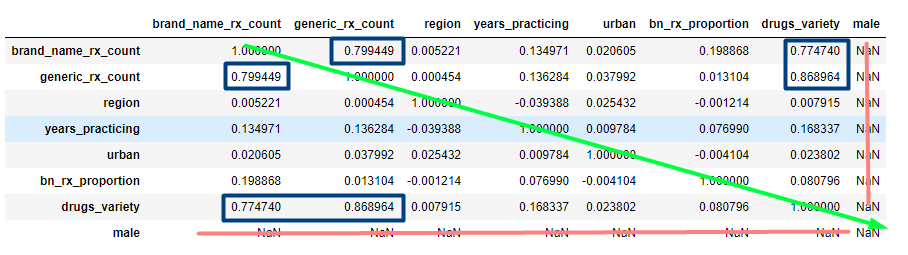

In [146]:
Image(filename='correletion.png')

In [143]:
f_df.corr()

brand_name_rx_count  generic_rx_count    region  \
brand_name_rx_count             1.000000          0.759766 -0.003404   
generic_rx_count                0.759766          1.000000  0.003979   
region                         -0.003404          0.003979  1.000000   
years_practicing                0.123268          0.108495  0.008547   
urban                           0.015109          0.035174  0.020110   
bn_rx_proportion                0.171048         -0.016233 -0.000639   
drugs_variety                   0.713361          0.880358  0.007451   
male                                 NaN               NaN       NaN   

                     years_practicing     urban  bn_rx_proportion  \
brand_name_rx_count          0.123268  0.015109          0.171048   
generic_rx_count             0.108495  0.035174         -0.016233   
region                       0.008547  0.020110         -0.000639   
years_practicing             1.000000 -0.023152          0.054022   
urban                       -0.023152  1.000000         -0.004802   
bn_rx_proportion             0.054022 -0.004802          1.000000   
drugs_variety                0.100885  0.043751          0.016833   
male                              NaN       NaN               NaN   

                     drugs_variety  male  
brand_name_rx_count       0.713361   NaN  
generic_rx_count          0.880358   NaN  
region                    0.007451   NaN  
years_practicing          0.100885   NaN  
urban                     0.043751   NaN  
bn_rx_proportion          0.016833   NaN  
drugs_variety             1.000000   NaN  
male                           NaN   NaN

In [135]:
m_ax = sns.pairplot(m_df.iloc[:, 1:-1], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

# —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å
m_ax.savefig('m_df_corr.png', transparent=False, dpi=300, bbox_inches="tight")

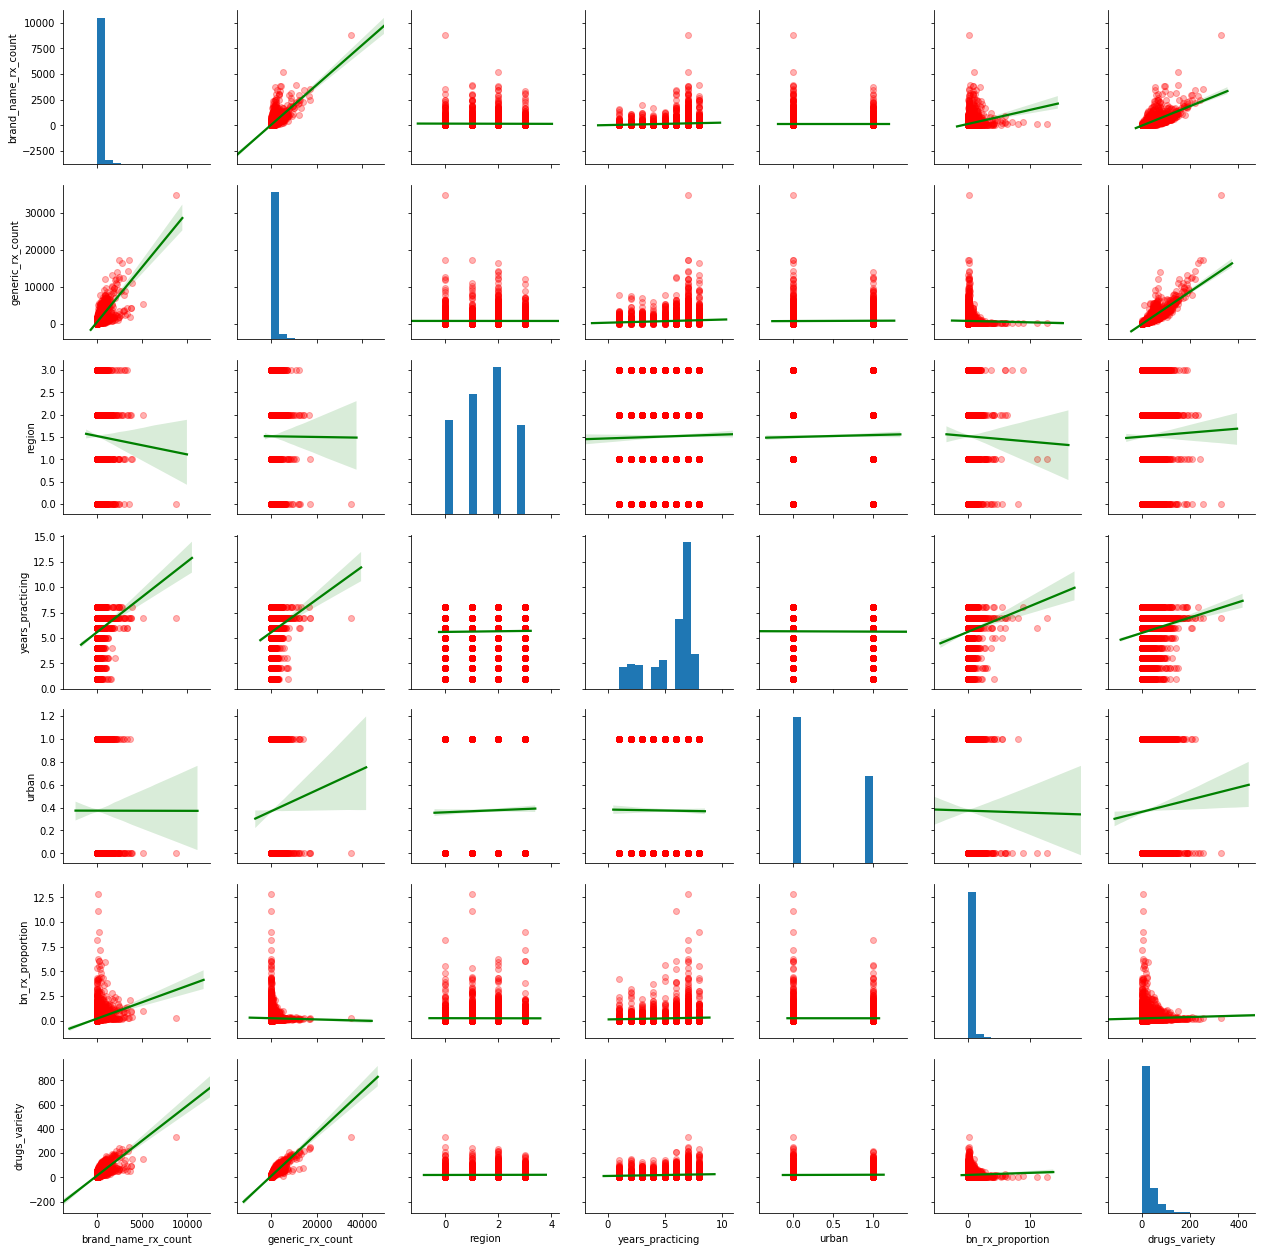

In [136]:
f_ax = sns.pairplot(f_df.iloc[:, 1:-1], kind='reg',
    plot_kws={'line_kws':{'color':'green'},
    'scatter_kws': {'color':'red', 'alpha': 0.3}})

f_ax.savefig('f_df_corr.png', transparent=False, dpi=400, bbox_inches="tight")

#### Scatter plot for 3 variables (bn_rx_proportion, brand_name_rx_count, years practicing) shows a lot amount of  proportions for  less than 5000 brand drugs for 7 years practicing.
### <font color=red> –í–≤–æ–¥ –Ω–µ–ø–æ–Ω—è—Ç–µ–Ω</font>

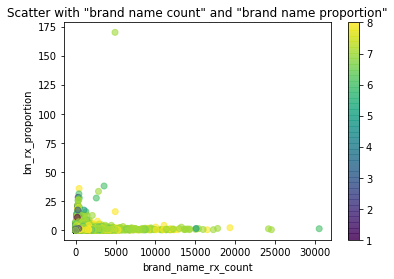

In [147]:
fig = plt.scatter(x=main_df.brand_name_rx_count,
                  y=main_df.bn_rx_proportion,
                  c=main_df.years_practicing,
                  alpha=0.6)
plt.title('Scatter with "brand name count" and "brand name proportion"')
plt.xlabel("brand_name_rx_count")
plt.ylabel("bn_rx_proportion")
plt.colorbar(fig)

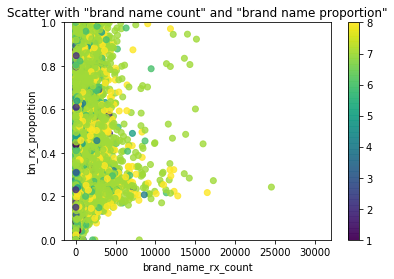

In [137]:
fig = plt.scatter(x=main_df.brand_name_rx_count,
                  y=main_df.bn_rx_proportion,
                  c=main_df.years_practicing,
                  alpha=0.6)
plt.title('Scatter with "brand name count" and "brand name proportion"')
plt.xlabel("brand_name_rx_count")
plt.ylabel("bn_rx_proportion")

# —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º –º—ã —Å–º–æ—Ç—Ä–∏–º —Ç–æ–ª—å–∫–æ –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è bn_rx_proportion –º–µ–∂–¥—É 0 –∏ 1
# —Å –ø–æ–º–æ—â—å—é ylim
plt.ylim(0, 1)
# ------------------

plt.colorbar(fig)
plt.savefig('Scatter_with_brand_name_count_and_proportion.png', transparent=False, dpi=300, bbox_inches="tight")

# <font color=red> –î–∞–ª–µ–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –±–ª–æ–∫? –°—Ç–æ–∏—Ç –ª–∏ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –æ—Ü–µ–Ω–∫—É –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ –ª–µ–∫–∞—Ä—Å—Ç–≤–∞–º? –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ä–µ—à–µ–Ω–∏–µ –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –≤—ã–ø–∏—Å–∞–Ω–Ω—ã–º –ø—Ä–µ–ø–∞—Ä–∞—Ç–∞–º. –ü–æ—á–µ–º—É –Ω–∞–º —ç—Ç–æ –Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ?</font> 

#### We will collect a list of doctors and sort them by the number of representatives.

In [148]:
count_docs_spec = main_df.specialty.value_counts()
count_docs_spec[:10]

General Practice          47836
Family                    24230
Psychiatry                22530
Cardiovascular Disease    13091
Medical                   12445
Gastroenterology           9695
Neurology                  8501
Adult Health               7444
Nephrology                 5997
Hematology & Oncology      5852
Name: specialty, dtype: int64

#### Create a table to analyze the frequency of prescribing medications for certain specialties. Combine `main_df.specialty` and` drugs`.

In [274]:
drugs_count = pd.concat([main_df.specialty, drugs],axis=1)

In [275]:
drugs_count= drugs_count.drop('drugs_variety',axis=1)

#### We will also need `pandas` library methods: [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) [`T(transpose)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html).

In [277]:
drugs_count = drugs_count.groupby(['specialty']).sum()
drugs_count = drugs_count.T
drugs_count

specialty                       Acute Care  \
1ST TIER UNIFINE PENTIPS               0.0   
ABACAVIR                              23.0   
ABELCET                                0.0   
ABILIFY                              567.0   
ABILIFY DISCMELT                       0.0   
ABILIFY MAINTENA                       0.0   
ABRAXANE                               0.0   
ABSTRAL                                0.0   
ACAMPROSATE CALCIUM                    0.0   
ACANYA                                 0.0   
ACARBOSE                              97.0   
ACCOLATE                               0.0   
ACCUNEB                                0.0   
ACCUPRIL                               0.0   
ACEBUTOLOL HCL                       119.0   
ACETAMINOPH-CAFF-DIHYDROCODEIN         0.0   
ACETAMINOPHEN-BUTALBITAL               0.0   
ACETAMINOPHEN-CODEINE                674.0   
ACETAZOLAMIDE                          0.0   
ACETIC ACID                            0.0   
ACETIC ACID-ALUMINUM                   0.0   
ACETYLCYSTEINE                         0.0   
ACIPHEX                                0.0   
ACITRETIN                              0.0   
ACTEMRA                                0.0   
ACTIGALL                               0.0   
ACTIMMUNE                              0.0   
ACTIQ                                  0.0   
ACTIVELLA                              0.0   
ACTONEL                              132.0   
...                                    ...   
ZOLMITRIPTAN                           0.0   
ZOLMITRIPTAN ODT                       0.0   
ZOLOFT                                 0.0   
ZOLPIDEM TARTRATE                   6773.0   
ZOLPIDEM TARTRATE ER                 233.0   
ZOLPIMIST                              0.0   
ZOMETA                                 0.0   
ZOMIG                                  0.0   
ZOMIG ZMT                             13.0   
ZONALON                                0.0   
ZONEGRAN                              27.0   
ZONISAMIDE                           414.0   
ZORTRESS                               0.0   
ZOSTAVAX                              12.0   
ZOSYN                                  0.0   
ZOVIA 1-35E                            0.0   
ZOVIA 1-50E                            0.0   
ZOVIRAX                                0.0   
ZUBSOLV                                0.0   
ZYCLARA                                0.0   
ZYFLO                                  0.0   
ZYFLO CR                               0.0   
ZYLET                                  0.0   
ZYLOPRIM                               0.0   
ZYMAXID                                0.0   
ZYPREXA                                0.0   
ZYPREXA RELPREVV                       0.0   
ZYPREXA ZYDIS                          0.0   
ZYTIGA                               337.0   
ZYVOX                                 11.0   

specialty                       Addiction (Substance Use Disorder)  \
1ST TIER UNIFINE PENTIPS                                       0.0   
ABACAVIR                                                       0.0   
ABELCET                                                        0.0   
ABILIFY                                                       45.0   
ABILIFY DISCMELT                                               0.0   
ABILIFY MAINTENA                                               0.0   
ABRAXANE                                                       0.0   
ABSTRAL                                                        0.0   
ACAMPROSATE CALCIUM                                            0.0   
ACANYA                                                         0.0   
ACARBOSE                                                       0.0   
ACCOLATE                                                       0.0   
ACCUNEB                                                        0.0   
ACCUPRIL                                                       0.0   
ACEBUTOLOL HCL                                                 0.0   
ACETAMINOPH-CAFF-DIHYDROCOD

# <font color=red> –ù–∏–∂–µ —Å–ø—Ä–∞–≤–æ—á–Ω—ã–π –±–ª–æ–∫, –æ—Ç –Ω–µ–≥–æ –º–æ–∂–Ω–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è, –µ—Å–ª–∏ –≤—ã —É–≤–µ—Ä–Ω–Ω–æ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É–µ—Ç–µ—Å—å –≤ –¥–∞–Ω–Ω—ã—Ö.</font> 

## –î–∞–ª—å—à–µ –∏–¥—É—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–µ—Ç–æ–¥—ã —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∏:

In [145]:
def to_10_prescription_by_spec(spec):
    print(drugs_count[spec].sort_values(ascending=False)[:10])

In [146]:
to_10_prescription_by_spec('Pulmonary Disease')

SPIRIVA                   606638.0
ADVAIR DISKUS             515898.0
PREDNISONE                368163.0
PROAIR HFA                339680.0
MONTELUKAST SODIUM        313831.0
SYMBICORT                 261288.0
AZITHROMYCIN              158565.0
OMEPRAZOLE                145859.0
FLUTICASONE PROPIONATE    142503.0
FUROSEMIDE                136863.0
Name: Pulmonary Disease, dtype: float64


#### –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–∏–µ –≤—Ä–∞—á–∏ –≤—ã–ø–∏—Å—ã–≤–∞—é—Ç –ø—Ä–µ–ø–∞—Ä–∞—Ç—ã —á–∞—â–µ –≤—Å–µ–≥–æ. –°–æ–±–µ—Ä–µ–º —Ç–∞–±–ª–∏—Ü—ã –≤ –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–µ—Å—Ç–∏–º –≤—Ä–∞—á–µ–π –≤—ã–ø–∏—Å—ã–≤–∞—é—â–∏—Ö –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ—Ü–µ–ø—Ç–æ–≤. –ò—Å–ø–æ–ª—å–∑—É–µ–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –ø–æ 2-–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º (—Ç–∏–ø–∞–º –ø—Ä–µ–ø–∞—Ä–∞—Ç–æ–≤).

In [147]:
top_docs_bn_prescription = main_df.sort_values(by = ['brand_name_rx_count','generic_rx_count'], ascending=False)
top_docs_bn_prescription.head(20)

specialty  brand_name_rx_count  \
npi                                                                     
1720134695                            Nephrology                30547   
1598788689                    Geriatric Medicine                24550   
1043244296                Cardiovascular Disease                24184   
1376541961                     Pulmonary Disease                19355   
1023124054                      Gastroenterology                17806   
1982654638                    Geriatric Medicine                17267   
1083619670                    Geriatric Medicine                16505   
1265488845                Cardiovascular Disease                15979   
1356360887                Cardiovascular Disease                15428   
1710915673  Endocrinology, Diabetes & Metabolism                15147   
1649449307                                Family                15106   
1326068560                            Nephrology                15018   
1285724724                Cardiovascular Disease                14327   
1730103664                    Geriatric Medicine                14248   
1619082625  Endocrinology, Diabetes & Metabolism                14019   
1871520726                    Geriatric Medicine                13793   
1003914227                Cardiovascular Disease                13634   
1336222504                            Psychiatry                13619   
1013953975  Endocrinology, Diabetes & Metabolism                13257   
1679581565  Endocrinology, Diabetes & Metabolism                12993   

            generic_rx_count  region  years_practicing  urban  \
npi                                                             
1720134695             27912       3                 6      0   
1598788689            101079       1                 7      0   
1043244296             23299       3                 7      0   
1376541961              9915       2                 8      1   
1023124054             13100       3                 7      0   
1982654638             63352       0                 7      1   
1083619670             75858       2                 8      1   
1265488845             36182       3                 7      0   
1356360887             13190       3                 7      0   
1710915673             16406       3                 7      0   
1649449307             11527       2                 5      1   
1326068560             24944       3                 7      0   
1285724724             17766       3                 7      0   
1730103664             50150       2                 7      0   
1619082625             14817       1                 7      0   
1871520726             28415       3                 7      0   
1003914227             16324       3                 7      0   
1336222504             44713       2                 7      1   
1013953975              5393       1                 7      0   
1679581565             10731       3                 7      0   

            bn_rx_proportion  drugs_variety  male  
npi                                                
1720134695          1.094404            384     1  
1598788689          0.242879            490     1  
1043244296          1.037984            223     1  
1376541961          1.952093             59     1  
1023124054          1.359237            219     1  
1982654638          0.272557            406     1  
1083619670          0.217578            421     1  
1265488845          0.441628            285     1  
1356360887          1.169674            230     1  
1710915673          0.923260            193     0  
1649449307          1.310488             68     0  
1326068560          0.602069            286     1  
1285724724          0.806428            190     1  
1730103664          0.284108            352     1  
1619082625          0.946143            251     0  
1871520726          0.485413            231     0  
1003914227          0.835212            267     0  
1336222504   

#### –¢–∞–∫ –∂–µ –∏–∑—É—á–∏–º –≤—Ä–∞—á–µ–π —Å –Ω–∏–º–µ–Ω—å—à–∏–º –∏ –Ω–∞–∏–±–æ–ª—å—à–∏–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º `bn_rx_proportion`.

In [148]:
main_df[main_df['generic_rx_count'] != 0].sort_values(by='bn_rx_proportion', ascending=False).head(10)

specialty  \
npi                                                             
1366493322  Preventive Medicine/Occupational Environmental...   
1295875615              Otolaryngology/Facial Plastic Surgery   
1174525927                                  Pulmonary Disease   
1053385815                         Emergency Medical Services   
1235264953                                       Adult Health   
1518250828                                 Infectious Disease   
1245425370                                  Pulmonary Disease   
1700936200               Endocrinology, Diabetes & Metabolism   
1356429088                             Critical Care Medicine   
1033286844                                   Gastroenterology   

            brand_name_rx_count  generic_rx_count  region  years_practicing  \
npi                                                                           
1366493322                 4932                29       2                 7   
1295875615                 3558                94       0                 6   
1174525927                  429                12       1                 8   
1053385815                 2860                86       0                 7   
1235264953                  404                13       3                 6   
1518250828                  309                11       2                 2   
1245425370                  443                16       0                 6   
1700936200                 2585                94       2                 6   
1356429088                  390                15       3                 7   
1033286844                  310                12       3                 7   

            urban  bn_rx_proportion  drugs_variety  male  
npi                                                       
1366493322      0        170.068966             13     0  
1295875615      1         37.851064              8     1  
1174525927      1         35.750000              9     1  
1053385815      0         33.255814              7     1  
1235264953      0         31.076923              9     1  
1518250828      0         28.090909              9     1  
1245425370      1         27.687500              9     0  
1700936200      1         27.500000             47     1  
1356429088      1         26.000000              7     1  
1033286844      0         25.833333              2     1

In [149]:
main_df[((main_df['years_practicing'] == 8)\
         & (main_df['brand_name_rx_count'] == 200))].sort_values(by='specialty',\
                                                ascending=False).head(10)

specialty  brand_name_rx_count  \
npi                                                                 
1871590737                      Rheumatology                  200   
1811990666                      Rheumatology                  200   
1144204850                 Pulmonary Disease                  200   
1184614018                 Pulmonary Disease                  200   
1760479224                        Psychiatry                  200   
1376535252                        Psychiatry                  200   
1831173970                        Psychiatry                  200   
1023002870                        Psychiatry                  200   
1821084641  Orthopaedic Surgery of the Spine                  200   
1275526709                         Neurology                  200   

            generic_rx_count  region  years_practicing  urban  \
npi                                                             
1871590737               733       1                 8      0   
1811990666              1716       3                 8      0   
1144204850               740       3                 8      1   
1184614018               273       2                 8      1   
1760479224              1686       2                 8      1   
1376535252              1700       1                 8      0   
1831173970              1076       3                 8      1   
1023002870               996       2                 8      1   
1821084641              1225       3                 8      0   
1275526709              1834       1                 8      1   

            bn_rx_proportion  drugs_variety  male  
npi                                                
1871590737          0.272851             20     0  
1811990666          0.116550             35     0  
1144204850          0.270270             33     1  
1184614018          0.732601             19     1  
1760479224          0.118624             52     1  
1376535252          0.117647             36     0  
1831173970          0.185874             38     1  
1023002870          0.200803             35     1  
1821084641          0.163265             18     1  
1275526709          0.109051             49     1

# Stat-analysis <a class="anchor" id="stat_a"></a>
[back to contents](#contents)


#### * –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –Ω–∞—Å–∫–æ–ª—å–∫–æ –≥—Ä—É–ø–ø—ã –¥–∞–Ω–Ω—ã—Ö –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–µ.

#### * —á—Ç–æ–±—ã —É–∑–Ω–∞—Ç—å —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ª–∏ –≥—Ä—É–ø–ø—ã –º–µ–∂–¥—É —Å–æ–±–æ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã—á–∏—Å–ª–∏—Ç—å [t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞ (–ø–æ–¥—Ä–æ–±–Ω–µ–µ –æ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –∏ –æ—Å–Ω–æ–≤–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è)](https://github.com/sqrt495/easy_lections/blob/master/Distribution_types/Distribution_types_Part1.ipynb);

#### * –∏—Å–ø–æ–ª—å–∑—É–µ–º –±–∏–±–ª–æ—Ç–µ–∫—É `scipy` –º–µ—Ç–æ–¥ [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)`.

In [17]:
from scipy.stats import ttest_ind

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –≥–∏–ø–æ—Ç–µ–∑

**–ö—Ä–∏—Ç–µ—Ä–∏–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏** —è–≤–ª—è—é—Ç—Å—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º —Ç–æ–≥–æ, —á—Ç–æ –ª–µ–∫–∞—Ä—Å—Ç–≤–æ(–Ω–ø–∞—Ä–∏–º–µ—Ä) –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –∏–ª–∏ —á—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–ª—É—á–∞–π–Ω—ã.


### –ü—Ä–∏–º–µ—Ä 1. –ê–≤—Ç–æ–±—É—Å —Å–æ —Å–ø—è—â–∏–º–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–∞–º–∏


–í –≥–æ—Ä–æ–¥–µ –ø—Ä–æ—Ö–æ–¥—è—Ç 2 –∫–æ–Ω—Ñ–µ—Ä–µ–Ω—Ü–∏–∏: –º–∞—Ç–µ–º–∞—Ç–∏–∫–æ–≤ –∏ –±–∞—Å–∫–µ—Ç–±–æ–ª–∏—Å—Ç–æ–≤. –ï–¥–µ—Ç –∞–≤—Ç–æ–±—É—Å —Å–æ —Å–ø—è—â–∏–º–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ–ª—å–∑—è –±—É–¥–∏—Ç—å, –Ω–æ –∏–∑–≤–µ—Å—Ç–µ–Ω –∏—Ö —Ä–æ—Å—Ç. –ö–∞–∫ –ø–æ–Ω—è—Ç—å, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –ø–∞—Å—Å–∞–∂–∏—Ä —Ñ—É—Ç–±–æ–ª–∏—Å—Ç–æ–º –∏–ª–∏ –º–∞—Ç–µ–º–∞—Ç–∏–∫–æ–º?


–°—Ä–µ–¥–Ω–∏–π —Ä–æ—Å—Ç –±–∞—Å–∫–µ—Ç–±–æ–ª–∏—Å—Ç–∞: 185-195 —Å–º


–°—Ä–µ–¥–Ω–∏–π —Ä–æ—Å—Ç —á–µ–ª–æ–≤–µ–∫–∞: –ø–æ –¥–∞–Ω–Ω—ã–º –≤—Å–µ–º–∏—Ä–Ω–æ–≥–æ —Å–æ–æ–±—â–µ—Å—Ç–≤–∞ —É—á—ë–Ω—ã—Ö-–º–µ–¥–∏–∫–æ–≤ ¬´NCD Risk Factor Collaboration¬ª (NCD-RisC), —Å—Ä–µ–¥–Ω–∏–π —Ä–æ—Å—Ç —Ä–æ—Å—Å–∏–π—Å–∫–∏—Ö –∂–µ–Ω—â–∏–Ω –Ω–∞ 2014 –≥–æ–¥ ‚Äî 165,3 —Å–º, –º—É–∂—á–∏–Ω ‚Äî 176,5 —Å–º


**–†–µ—à–µ–Ω–∏–µ**: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–æ—Å—Ç–∞ –¥–≤—É—Ö –≤—ã–±–æ—Ä–æ–∫ (–±–∞—Å–∫–µ—Ç–±–æ–ª–∏—Å—Ç–æ–≤ –∏ –º–∞—Ç–µ–º–∞—Ç–∏–∫–æ–≤) —Å –±–æ–ª—å—à–æ–π —Å—Ç–µ–ø–µ–Ω—å—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –±—É–¥–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ —Ç–æ–º, –∫ –∫–∞–∫–æ–π –≤—ã–±–æ—Ä–∫–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π –ø–∞—Å—Å–∞–∂–∏—Ä. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –¥–≤–µ –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Ä–æ—Å—Ç–µ.
<a class="anchor" id="5!"></a>

# –ê–ª–≥–æ—Ä–∏—Ç–º –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –≥–∏–ø–æ—Ç–µ–∑

*   —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è **–æ—Å–Ω–æ–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H0** –∏ **–∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ H1**;
*   –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π, —Å –ø–æ–º–æ—â—å—é –∫–æ—Ç–æ—Ä–æ–≥–æ –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ—Ä—è—Ç—å—Å—è –≥–∏–ø–æ—Ç–µ–∑–∞;
*   –∑–∞–¥–∞—ë—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Œ±;
*   –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≥—Ä–∞–Ω–∏—Ü—ã –æ–±–ª–∞—Å—Ç–∏ –ø—Ä–∏–Ω—è—Ç–∏—è –≥–∏–ø–æ—Ç–µ–∑—ã;
*   –¥–µ–ª–∞–µ—Ç—Å—è –≤—ã–≤–æ–¥ –æ –ø—Ä–∏–Ω—è—Ç–∏–∏ –∏–ª–∏ –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏–∏ –æ—Å–Ω–æ–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã H0.

# [P-value –∏–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)


P-–∑–Ω–∞—á–µ–Ω–∏–µ, –∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, —ç—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –≤–µ–ª–∏—á–∏–Ω–∞, –≤—ã—Ä–∞–∂–µ–Ω–Ω–∞—è —á–∏—Å–ª–æ–º –æ—Ç 0 –¥–æ 1, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã. –í –∫–ª–∏–Ω–∏—á–µ—Å–∫–∏—Ö –∏—Å–ø—ã—Ç–∞–Ω–∏—è—Ö –¥–∞–Ω–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –≤ –∫–ª–∏–Ω–∏—á–µ—Å–∫–∏—Ö –∏—Å–ø—ã—Ç–∞–Ω–∏—è—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–ª—É—á–∞–π–Ω—ã–º.

–î–æ –Ω–∞—á–∞–ª–∞ —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–π –æ–±—ã—á–Ω–æ —Ä–∞–≤–µ–Ω 5 % (–∏–ª–∏ 0,05), —Ö–æ—Ç—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–±—Ä–∞–Ω –∏ –¥—Ä—É–≥–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å.

**–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º** (–∏ –ø–æ–∑–≤–æ–ª—è—é—â–∏–º –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É)–ø—Ä–∏ —ç—Ç–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —Ä-–∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞–≤–Ω–æ —É—Ä–æ–≤–Ω—é –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∏–ª–∏ –º–µ–Ω—å—à–µ –µ–≥–æ. –≠—Ç–æ, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: p ‚â§ 0,05.

 –ü—Ä–∏ **–Ω–µ–±–æ–ª—å—à–æ–º p-–∑–Ω–∞—á–µ–Ω–∏–∏** –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–∞ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, —á—Ç–æ –¥–∞–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–µ **–æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É**. –ü—Ä–∏ **–±–æ–ª—å—à–æ–º p-–∑–Ω–∞—á–µ–Ω–∏–∏** –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏, –∏ **–ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–µ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç–æ**.

In [35]:
main_df = pd.read_csv('out.scv') 
main_df = main_df.set_index('npi') 
main_df.head(2)

specialty  brand_name_rx_count  generic_rx_count  region  \
npi                                                                           
1295763035        Nephrology                  384              2287       2   
1992715205  General Practice                    0               103       2   

            years_practicing  urban  bn_rx_proportion  drugs_variety  male  
npi                                                                         
1295763035                 7      0          0.167906             68     1  
1992715205                 7      0          0.000000              3     1

### –í—Å–ø–æ–º–Ω–∏–º, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω—ã –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∏ –∫–∞–∫–∏–µ –≤–∏–¥—ã —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏—è –±—ã–≤–∞—é—Ç –≤–ø—Ä–∏–Ω—Ü–∏–ø–µ.

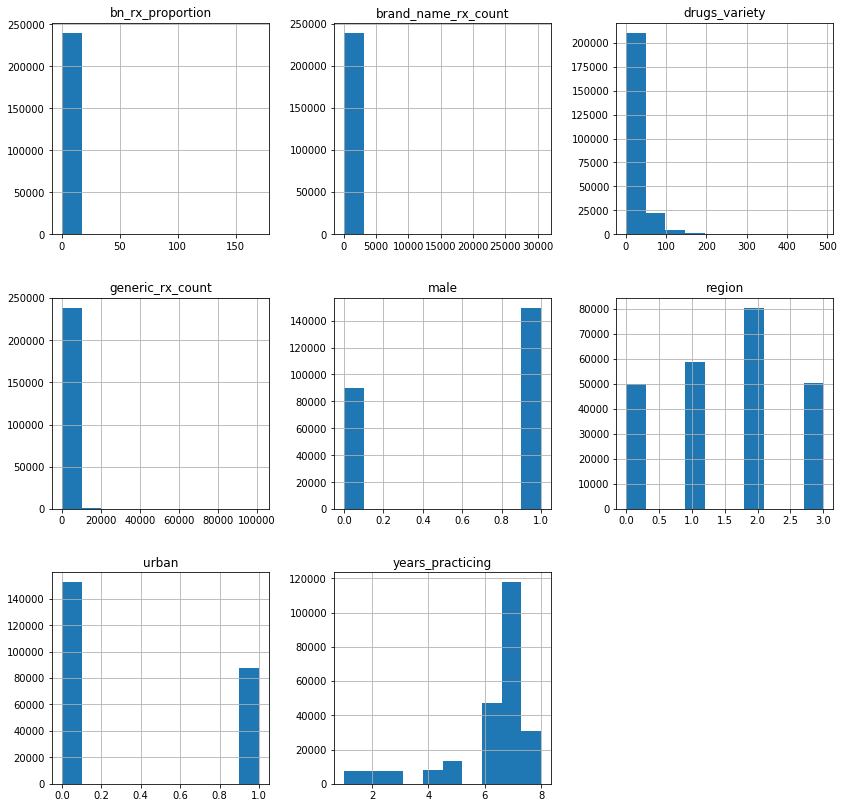

In [24]:
main_df.iloc[:,1:].hist(figsize=(14, 14));

In [25]:
HTML('<img src="https://habrastorage.org/getpro/habr/post_images/4f6/5f4/edb/4f65f4edb921715dbb56a320a65b101e.png">')

#### –£–¥–∞–ª–∏ —ç–∫—Å—Ç–∏—Ä–∏–º–∞–ª—å–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è—Ö `brand_name_rx_count` –∏ `generic_rx_count` –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –µ—â–µ —Ä–∞–∑.

In [44]:
cut_main_df = main_df[((main_df['brand_name_rx_count'] > 0)
                       & (main_df['brand_name_rx_count'] < 5500)
                       & (main_df['generic_rx_count'] > 0)
                       & (main_df['generic_rx_count'] < 20000))]

len(cut_main_df), len(main_df)

(130662, 239930)

–õ—é–±–æ–ø—ã—Ç–Ω–æ, —á—Ç–æ –ø–æ—á—Ç–∏ –ø–æ–ª–æ–≤–∏–Ω–∞ –≤—Ä–∞—á–µ–π –≤ –≤—ã–±–æ—Ä–∫–µ –Ω–µ –≤—ã–ø–∏—Å—ã–≤–∞–µ—Ç –±—Ä–µ–Ω–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–µ–ø–∞—Ä–∞—Ç—ã.

In [46]:
len(main_df[main_df['brand_name_rx_count'] == 0])

104818

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215AD8DDF98>,
      dtype=object)

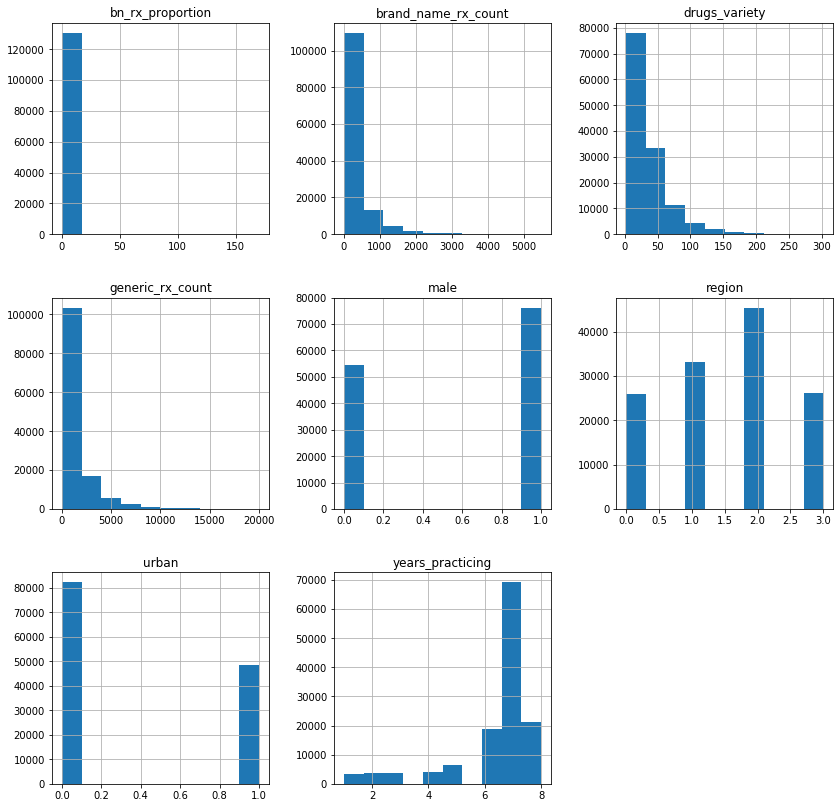

In [45]:
cut_main_df.iloc[:,1:].hist(figsize=(14, 14))

### –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å —Ä–µ—Ü–µ–ø—Ç–æ–≤ —É –≤—Ä–∞—á–µ–π –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è, —Å–¥–µ–ª–∞–µ–º –≤—ã–±–æ—Ä–∫—É –ø–æ —Å–ª–µ–¥—É—é—â–∏–º —É—Å–ª–æ–≤–∏—è–º:

* `brand_name_rx_count > 20`
* `generic_rx_count < 20000`
* `years_practicing > 4`

–ö–æ–ª-–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π:  36535 
–î–∏—Å–ø–µ—Ä—Å–∏—è:  1073.2396334711495


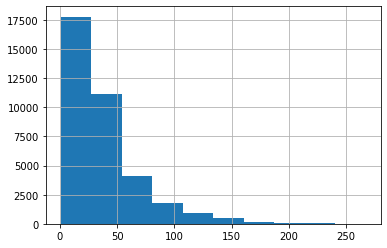

In [67]:
f_drugs_variety = main_df[((main_df['years_practicing'] > 4)
                                & (main_df['brand_name_rx_count'] > 20)
                                & (main_df['generic_rx_count'] < 20000)
                                & (main_df['male'] == 0))]['drugs_variety']
                           
print('–ö–æ–ª-–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π: ',len(f_drugs_variety), '\n–î–∏—Å–ø–µ—Ä—Å–∏—è: ', statistics.variance(f_drugs_variety))
f_drugs_variety.hist()

–ö–æ–ª-–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π:  65043 
–î–∏—Å–ø–µ—Ä—Å–∏—è:  1180.525951356423


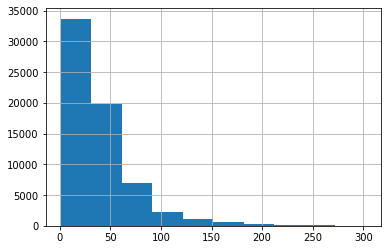

In [68]:
m_drugs_variety = main_df[((main_df['years_practicing'] > 4)
                                & (main_df['brand_name_rx_count'] > 20)
                                & (main_df['generic_rx_count'] < 20000)
                                & (main_df['male'] == 1))]['drugs_variety']
                           

print('–ö–æ–ª-–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π: ',len(m_drugs_variety), '\n–î–∏—Å–ø–µ—Ä—Å–∏—è: ', statistics.variance(m_drugs_variety))
m_drugs_variety.hist()

In [69]:
# —É—Ä–∞–≤–Ω—è–µ–º –≤—ã–±–æ—Ä–∫–∏
m_drugs_variety = m_drugs_variety.sample(36535)

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏(`stats.mannwhitneyu`), —á—Ç–æ–±—ã –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –∏–ª–∏ –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.

In [70]:
u, p_value = stats.mannwhitneyu(f_drugs_variety, m_drugs_variety)
print('Two-sample Mannwhitneyu-test = %.6f' % (p_value))

Two-sample Mannwhitneyu-test = 0.000000


#### –ì–∏–ø–æ—Ç–µ–∑–∞, —á—Ç–æ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤—ã–ø–∏—Å–∫–∏ –ª–µ–∫–∞—Ä—Å—Ç —Å—Ä–µ–¥–∏ –≤—Ä–∞—á–µ–π-–º—É–∂—á–∏–Ω–∞–º–∏ –∏ –≤—Ä–∞—á–µ–π-–∂–µ–Ω—â–∏–Ω —Å—Ö–æ–∂–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –º—ã –ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –æ—Å—Ç–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–º –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

# The goal & Feature selection <a class="anchor" id="goal-fs"></a>
[back to contents](#contents)

–ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º `male` - –ø–æ—Å–ª–µ–¥–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫ –∏—Å—Ö–æ–¥–Ω—ã—Ö –º–∞—Å—Å–∏–≤–æ–≤. 

In [162]:
target_names=['female', 'male']

### –£ –Ω–∞—Å –µ—Å—Ç—å 2 —Ç–∞–±–ª–∏—Ü—ã —Å –¥–∞–Ω–Ω—ã–º–∏, –µ—â–µ —Ä–∞–∑ –≤—Å–ø–æ–º–∏–Ω–∞–µ–º –≤ —á–µ–º —Ä–∞–∑–ª–∏—á–∏—è –≤ `cat_df` –∏ `W_df`:

In [163]:
# –ø–æ—Å–ª–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞, –Ω–∞–∏—á–Ω–∏–∞—Ç—å —Å —ç—Ç–æ–≥–æ –º–µ—Ç—Å–∞
cat_df = pd.read_csv('cat_df.csv')  
cat_df = cat_df.set_index('npi')
cat_df.head(2)

specialty  brand_name_rx_count  generic_rx_count  region  \
npi                                                                           
1295763035        Nephrology                  384              2287       2   
1992715205  General Practice                    0               103       2   

            years_practicing  urban  bn_rx_proportion  drugs_variety  male  
npi                                                                         
1295763035                 7      0          0.167906             68     1  
1992715205                 7      0          0.000000              3     1

In [164]:
# –ø–æ—Å–ª–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞, –Ω–∞–∏—á–Ω–∏–∞—Ç—å —Å —ç—Ç–æ–≥–æ –º–µ—Ç—Å–∞
W_df = pd.read_csv('W_df.csv') 
W_df = W_df.set_index('npi')
W_df.head(2)

specialty  brand_name_rx_count  generic_rx_count  \
npi                                                                   
1295763035        Nephrology                  384              2287   
1992715205  General Practice                    0               103   

            years_practicing  urban  bn_rx_proportion  drugs_variety  Midwest  \
npi                                                                             
1295763035                 7      0          0.167906             68        0   
1992715205                 7      0          0.000000              3        0   

            Northeast  South  ...  Infectious  Rheumatology  Cardiology  \
npi                           ...                                         
1295763035          0      1  ...           0             0           0   
1992715205          0      1  ...           0             0           0   

            Psychiatry  Oncology  Nephrology  Pulmonology  Geriatric  \
npi                                                                    
1295763035           0         0           1            0          0   
1992715205           0         0           0            0          0   

            Technology  male  
npi                           
1295763035           0     1  
1992715205           0     1  

[2 rows x 33 columns]

–£ –Ω–∞—Å –µ—Å—Ç—å —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –Ω–∞—á–∞–ª–µ –≤ —Å—Ç–æ–ª–±—Ü–µ `specialty` - –∏—Ö –Ω—É–∂–Ω–æ –ª–∏–±–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –∫ —á–∏—Å–ª–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º (—á—Ç–æ–±—ã –æ–Ω–∏ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏), –ª–∏–±–æ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –≤–æ–≤—Å–µ.

–ö–æ–¥ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –º—ã —É–∂–µ –¥–∞–ª–∞–ª–∏ [–∑–¥–µ—Å—å](#here),–¥—É–±–ª–∏—Ä—É –Ω–∏–∂–µ. –í–Ω–∏–º–∞–Ω–∏–µ: –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `target_df` –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏–µ–º —Ç–∞–±–ª–∏—Ü—ã, –∫–æ—Ç–æ—Ä—É—é —Ö–æ—Ç–∏–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å (`cat_df` –∏–ª `W_df`).

In [165]:
# target_df['specialty'] = target_df['specialty'].astype('category')
# target_df['specialty'] = target_df['specialty'].cat.codes

–¢–∞–∫ –∂–µ –µ—Å—Ç—å –≤—Ç–æ—Ä–æ–π –≤–∞—Ä–∏–∞–Ω—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è `specialty` ‚Äî —Ä–∞–∑–±–∏—Ç—å —Å—Ç–æ–ª–±–µ—Ü –Ω–∞ 282 (–ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π) —Å—Ç–æ–ª–±—Ü–∞ –≤ —Å—Ç—Ä–æ–∫–∞—Ö –∫–æ—Ç–æ—Ä—ã—Ö –±—É–¥—É—Ç –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –µ–¥–∏–Ω–∏—Ü—ã –∏ –Ω—É–ª–∏. [–ü–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å —ç—Ç–∏–º –∫–æ–¥–æ–º](#here2)

In [166]:
# spec_series = pd.get_dummies(target_df['specialty'])
# target_df = pd.concat([target_df, spec_series], axis = 1)
# target_df= target_df.drop(['specialty'], axis=1)

#### –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –±—É–¥—É—Ç –¥–∞–≤–∞—Ç—å –∏—Å–∫–∞–∂–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ–∑–∞, –Ω–æ –¥–ª—è –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–≥—É—Ç —Å—Ç–∞—Ç—å –¥—Ä–∞–π–≤–µ—Ä–æ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –î–ª—è –ø—Ä–∏–º–µ—Ä–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ä–∞–∑–Ω—ã–º–∏ —Ç–∞–±–ª–∏—Ü–∞–º–∏ –∏ –æ—Ü–µ–Ω–∏–º —Ä–∞–∑–Ω–∏—Ü—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–µ–π.

### –û–ø—Ä–µ–¥–µ–ª—è—é `X_cat`

In [167]:
cat_df['specialty'] = cat_df['specialty'].astype('category')
cat_df['specialty'] = cat_df['specialty'].cat.codes
X_cat = cat_df.iloc[:,:-1]
X_cat.head(2)

specialty  brand_name_rx_count  generic_rx_count  region  \
npi                                                                    
1295763035        135                  384              2287       2   
1992715205         85                    0               103       2   

            years_practicing  urban  bn_rx_proportion  drugs_variety  
npi                                                                   
1295763035                 7      0          0.167906             68  
1992715205                 7      0          0.000000              3

### –û–ø—Ä–µ–¥–µ–ª—è—é `X_unspec` –∏—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è, —á—Ç–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–ª –≤—Ä–∞—á–∞

In [168]:
X_unspec = X_cat.drop('specialty', axis=1)
X_unspec.head(2)

brand_name_rx_count  generic_rx_count  region  years_practicing  \
npi                                                                           
1295763035                  384              2287       2                 7   
1992715205                    0               103       2                 7   

            urban  bn_rx_proportion  drugs_variety  
npi                                                 
1295763035      0          0.167906             68  
1992715205      0          0.000000              3

### –û–ø—Ä–µ–¥–µ–ª—è—é `X_std` –ø—Ä–µ–º–µ–Ω–Ω—É—é –±–µ–∑ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π, —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –£–¥–∞–ª—è—é, —Ç–∞–∫ –∂–µ —Å—Ç–æ–ª–±–µ—Ü `bn_rx_proportion`.

In [169]:
X_std = W_df.iloc[:,1:-1]
X_std = X_std.drop('bn_rx_proportion', axis=1)
X_std.head(2)

brand_name_rx_count  generic_rx_count  years_practicing  urban  \
npi                                                                          
1295763035                  384              2287                 7      0   
1992715205                    0               103                 7      0   

            drugs_variety  Midwest  Northeast  South  West  female_doctor  \
npi                                                                         
1295763035             68        0          0      1     0              0   
1992715205              3        0          0      1     0              0   

            ...  Gastroenterology  Infectious  Rheumatology  Cardiology  \
npi         ...                                                           
1295763035  ...                 0           0             0           0   
1992715205  ...                 0           0             0           0   

            Psychiatry  Oncology  Nephrology  Pulmonology  Geriatric  \
npi                                                                    
1295763035           0         0           1            0          0   
1992715205           0         0           0            0          0   

            Technology  
npi                     
1295763035           0  
1992715205           0  

[2 rows x 30 columns]

## Quality metrics<a class="anchor" id="quality-metrics"></a>
[back to contents](#contents)

 In the field of machine learning and specifically the problem of statistical classification, a **confusion matrix**, also known as an error matrix. 
 
 A **confusion matrix** is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
 
It shows the ways in which your classification model is confused when it makes predictions, and gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [13]:
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png.png">')

In [203]:
display(Math(r'\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}'))
display(Math(r'\large precision = \frac{TP}{TP + FP}')), display(Math(r'\large recall = \frac{TP}{TP + FN}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(None, None)

 Unlike **accracy**, **precision** and **recall** do not depend on the correlation of classes and therefore are applicable in conditions of unbalanced samples. Often, in real practice, the task is to find the optimal balance between these two metrics. The most commonly used way to combine precision and recall into an aggregate quality criterion. F-measure - is harmonic mean of the precision and recall, where an **F1 score** reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [187]:
def plot_confusion_matrix(clf,
                          X_test,
                          y_test,
                          title='_____',
                          normalize=False,
                          only_predict=False):
    
    
    """
    This function prints and plots the confusion matrix.
    
    get into:
    
    1. clf - –∏–º—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞
    2. X_test - —Ç–µ—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏/–¥–∞–Ω–Ω—ã–µ
    3. y_test - –≤–µ—Ä–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    4. title - –Ω–∞–∑–≤–∞–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–π –º–æ–¥–µ–ª–∏
    ---------------------
    5. Normalization can be applied by setting `normalize=True`.
    6. switch for models with one-dimensional prediction `only_predict=True`.
    
    return pandas DF with cm values and y_pred_test_round
    """
    
    classes=target_names
    
    if only_predict:
        y_pred_test = clf.predict(X_test)
        y_pred_test_round = y_pred_test
        cm = confusion_matrix(y_test, y_pred_test_round)
    else:
        y_pred_test = clf.predict_proba(X_test)[:, 1]
        y_pred_test_round = np.around(y_pred_test)
        cm = confusion_matrix(y_test, y_pred_test_round)
    
    
    tn, fp, fn, tp = cm.ravel()
    model_qality_df = pd.DataFrame(np.array([[title, tn,fp,fn,tp]]),
                                columns=['model','tn','fp','fn','tp'])

    
    cmap=plt.cm.Blues
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'{title}.tiff', transparent=False, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
    
    return model_qality_df, y_pred_test_round

### –ú—ã –±—É–¥–µ–º –Ω–∞–∫–∞–ø–ª–∏–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º `'tn', 'fp', 'fn', 'tp'` –≤ –æ–±—â—É—é —Ç–∞–±–ª–∏—Ü—É –∏ —Å–º–æ–∂–µ–º —É–¥–æ–±–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –∫–∞–∂–¥—É—é –º–æ–¥–µ–ª—å –ø–æ —Ä–∞–∑–ª–∏—á–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º:

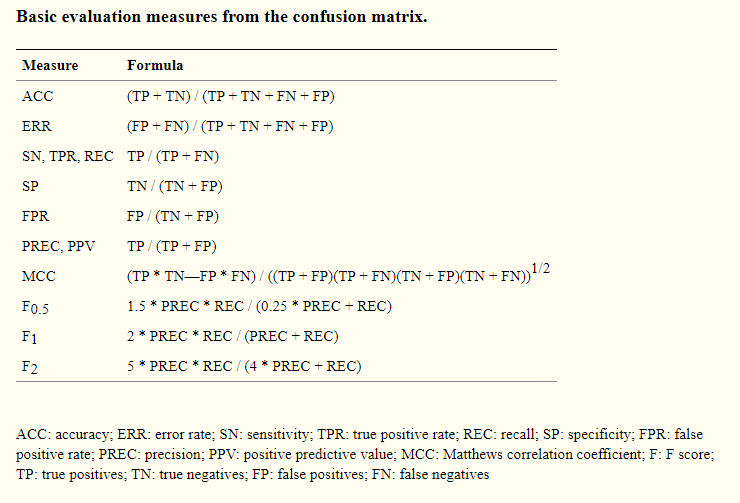

In [16]:
Image(filename='basic_measures_in_conf_matrix.png')

### AUC-ROC –∏ AUC-PR


 **AUC-ROC (or ROC AUC) - the area (Area Under Curve) under the error curve (Receiver Operating Characteristic curve)**. This curve is a line from (0,0) to (1,1) in the coordinates of True Positive Rate (TPR) and False Positive Rate (FPR):

In [17]:
display(Math(r'\large TPR = \frac{TP}{TP + FN}')), display(Math(r'\large FPR = \frac{FP}{FP + TN}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(None, None)

 We already know **TPR, this is recall**, and **FPR** shows which fraction of the negative class objects the algorithm predicted incorrectly. In the ideal case, when the classifier does not make mistakes (FPR = 0, TPR = 1) we get the area under the curve equal to unity; otherwise, when the classifier accidentally gives class probabilities, AUC-ROC will tend to 0.5, since the classifier will produce the same number of TP and FP.

#### –î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é:

In [186]:
def show_auc(clf, X_train, y_train, X_test, y_test, plot_name, only_predict=False): 
    
    '''get into:
    
    1. clf - –∏–º—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞
    2. X_train - —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏/–¥–∞–Ω–Ω—ã–µ
    3. y_train - –≤–µ—Ä–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
    4. X_test - —Ç–µ—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏/–¥–∞–Ω–Ω—ã–µ
    5. y_test - –≤–µ—Ä–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    6. plot_name - –Ω–∞–∑–≤–∞–Ω–∏–µ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞ –∏ –∏–º—è —Å–æ—Ö—Ä–∞–Ω—è–µ–º–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–∏
    -----------------------------------------
    7. switch for models with one-dimensional prediction `only_predict=True`.
    
    return roc auc plot, y_pred_train, y_pred_test'''    

    # compute predict_proba
    if only_predict:
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
    else:
        y_pred_train = clf.predict_proba(X_train)[:, 1]
        y_pred_test = clf.predict_proba(X_test)[:, 1]
    
    
    fpr0, tpr0, ths0 = roc_curve(y_train, y_pred_train) # compute fpr, tpr, thresholds and roc_auc for train
    roc_auc0 = auc(fpr0, tpr0)    
    
    fpr, tpr, ths = roc_curve(y_test, y_pred_test) # compute fpr, tpr, thresholds for test
    roc_auc = auc(fpr, tpr) # compute area under the curve
    
    plt.figure()
    plt.plot(fpr0, tpr0, label='Train ROC curve (area = %0.4f)' % (roc_auc0), color='b')
    plt.plot(fpr, tpr, label='Test ROC curve (area = %0.4f)' % (roc_auc0), color='g')
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='grey')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(plot_name)
    plt.legend(loc="best")
    
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, ths, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([ths[-1],ths[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    
     # print text
    print('Train ROC AUC: {0:.4f}'.format(roc_auc0))
    print('Test ROC AUC: {0:.4f}'.format(roc_auc))

    
    plt.savefig(f'{plot_name}.tiff', transparent=False, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
    
    return y_pred_train, y_pred_test

**Also let's show the text report showing the main classification metrics for LogRegression.**

**Precision score of 1.0 for the class** means that every item labeled as belonging to class C does indeed belong to class (but says nothing about the number of items from class C that were not labeled correctly) whereas **a recall of 1.0** means that every item from class C was labeled as belonging to class C (but says nothing about how many items from other classes were incorrectly also labeled as belonging to class C).

We see  precision, recall and F1-score for each class. In this case, model didn't classify females. Here *recall value for male* means that every male from sample was labeled as belonging to male class (but says nothing about how many items from other class were incorrectly also labeled as belonging to class male).

**The report includes macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise.**

#### –î–ª—è –≤—ã–∑–æ–≤–∞ –æ—Ç—á–µ—Ç–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é:

In [185]:
def clf_report(y_pred_test_round, y_test, target_names=target_names): 
    
    print(classification_report(y_test, y_pred_test_round))
    
    print('\nAccuracy: ', accuracy_score(y_test, y_pred_test_round))

# Basic models <a class="anchor" id="basic_models"></a>

## Import libraries and split dataset on train and test (25/75).

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [171]:
# –≤—ã–±–∏—Ä–∞—é —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π –∫–ª–∞—Å—Å–æ–≤

X_cat = X_cat.iloc[30000:90000, :]
X_unspec = X_unspec.iloc[30000:90000, :]
X_std = X_std.iloc[30000:90000, :]
y = W_df.iloc[30000:90000,-1]

# –æ—Ü–µ–Ω–∏–≤–∞—é –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

y.value_counts()

1    37565
0    22435
Name: male, dtype: int64

–ß—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –±–∞–ª–∞–Ω—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π –∫–ª–∞—Å—Å–∞ –≤ –≤—ã–±–æ—Ä–∫–µ, –º–æ–∂–Ω–æ –ø–µ—Ä–µ–¥–∞—Ç—å –≤ `train_test_split` –∞—Ä–≥—É–º–µ–Ω—Ç `stratify`.

In [172]:
X_cat_train, X_cat_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.25, stratify=y)
X_unspec_train, X_unspec_test, y_train, y_test = train_test_split(X_unspec, y, test_size=0.25, stratify=y)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y)

#### Normilize `X_std` features.

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(X_std_train.values)

X_std_train = scaler.transform(X_std_train)
X_std_test = scaler.transform(X_std_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## Get seed

In [174]:
seed = 40

# Logistic regression <a class="anchor" id="Log"></a>
[back to contents](#contents)

**The logistic model** (or logit model) is used to model the probability of a certain class. This can be extended to model several classes of events. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

**Logistic regression is a linear classifier, so you‚Äôll use a linear function ùëì(ùê±) = ùëè‚ÇÄ + ùëè‚ÇÅùë•‚ÇÅ + ‚ãØ + ùëè·µ£ùë•·µ£, also called the logit. The variables ùëè‚ÇÄ, ùëè‚ÇÅ, ‚Ä¶, ùëè·µ£ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.**

The logistic regression function ùëù(ùê±) is the **sigmoid function of ùëì(ùê±): ùëù(ùê±) = 1 / (1 + exp(‚àíùëì(ùê±)).** As such, it‚Äôs often close to either 0 or 1. The function ùëù(ùê±) is often interpreted as the predicted probability that the output for a given ùê± is equal to 1. Therefore, 1 ‚àí ùëù(ùë•) is the probability that the output is 0.

Logistic regression determines the best predicted weights ùëè‚ÇÄ, ùëè‚ÇÅ, ‚Ä¶, ùëè·µ£ such that the function ùëù(ùê±) is as close as possible to all actual responses ùë¶·µ¢, ùëñ = 1, ‚Ä¶, ùëõ, where ùëõ is the number of observations. The process of calculating the best weights using available observations is called model training or fitting.

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
clf_LR = LogisticRegression(random_state=seed)
clf_LR.fit(X_std_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Parameters and LogLoss function



**The logistic function of losses**, it underlies the logistic regression. Minimization of the logistic function of losses is a task that logistic regression solves, taking as a basis the principle of maximum likelihood.

Logloss minimization can be thought of as the task of maximizing accuracy by a fine for incorrect predictions. However, it should be noted that logloss extremely fines for the confidence of the classifier in the wrong answer.



To fine-tune the model for error, regularization is used - this is a way to reduce the complexity of the model in order to prevent retraining or fix an incorrectly posed problem. This is usually achieved by adding some a priori information to the problem statement.

* **penalty**: {'l1', default ='l2', 'elasticnet', 'none'}


* **C**: default = 1.0, should be positive float.

Like in **SVM**, smaller values specify stronger regularization.

In [27]:
HTML('<img src="https://nagornyy.me/img/content/svm_nonlin.png">')

### Let's calculate which features are most important for the model.
#### As we see, model sorted values from positives to negatives. For example, we can say that 'years_practicing' & 'specialty' are two parameters which has different 'weight' for the model, but we cannot say one parameter is more significant than another, they are equally important, just in a different way.

In [178]:
features = list(X_std.columns)

In [179]:
#create dictionary
LR_coefs = dict(zip(features, clf_LR.coef_[0]))
LR_coefs = sorted(LR_coefs.items(), key=lambda x: x[1], reverse=True)
LR_coefs

[('generic_rx_count', 0.6264003478362917),
 ('years_practicing', 0.5362326965655326),
 ('Surgery', 0.45613764417264574),
 ('Cardiology', 0.4307928325297432),
 ('Gastroenterology', 0.3293152755677759),
 ('brand_name_rx_count', 0.2293989565176628),
 ('practice', 0.2182980516236383),
 ('Nephrology', 0.20967455968888096),
 ('Pulmonology', 0.2007572689239158),
 ('urology', 0.19514624723096047),
 ('sport_medicine', 0.1813489345800973),
 ('Oncology', 0.18062485454536203),
 ('Radiology', 0.1723843447907293),
 ('paint_medicine', 0.15886605131416634),
 ('Psychiatry', 0.10084701447401473),
 ('Infectious', 0.07755034260758566),
 ('Geriatric', 0.07721718877622287),
 ('dentistry', 0.06469916545570613),
 ('West', 0.0601870475271022),
 ('Endocrinology', 0.043067263452794366),
 ('Rheumatology', 0.04197773659824819),
 ('immunology', 0.03827646902538449),
 ('South', 0.0180142181320972),
 ('urban', 0.008031826434264436),
 ('Midwest', -0.010589865665069092),
 ('pediatry', -0.06013267605363498),
 ('Northeas

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏, –≤–∑—è–≤ 3 –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞:

* `generic_rx_count`
* `years_practicing`
* `drugs_variety`

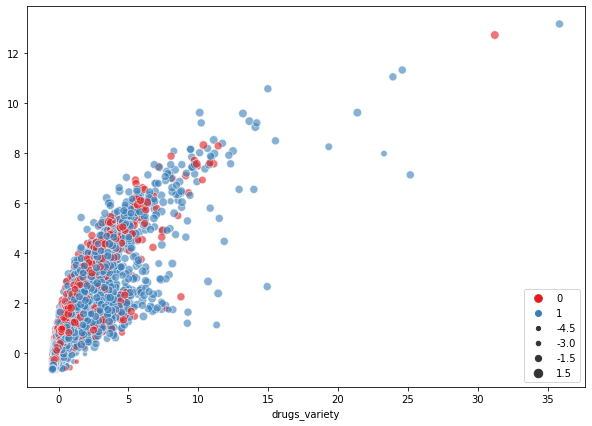

In [150]:
# —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ X_std_train
pltting_LR_train_result = X_std_train.T

# —Ä–∏—Å—É–µ–º
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x=pltting_LR_train_result[1],
                     y=pltting_LR_train_result[4],
                     size=pltting_LR_train_result[2],
                     hue=y_train.values,
                     palette='Set1', alpha=.6)

plt.legend(loc='lower right')
plt.xlabel('generic_rx_count')
plt.xlabel('drugs_variety')
plt.savefig('Train_classification_result.tiff', transparent=False, dpi=300, bbox_inches="tight")

### Estimate the model quality.

**Let's build the ROC curve, a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.**

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall. The false-positive rate is also known as probability of false alarm and can be calculated as (1 ‚àí specificity).

In this example we get probability of 1 (male) for test and train sets. 

**We can see, that classifier worked almost the same for train and test sets.**

Train ROC AUC: 0.7399
Test ROC AUC: 0.7475


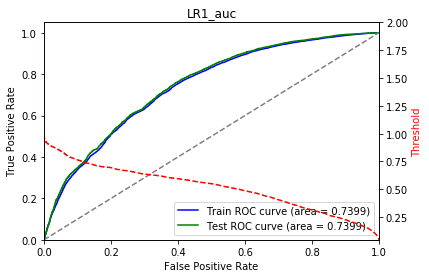

In [166]:
y_LR_pred_train, y_LR_pred_test = show_auc(clf_LR, X_std_train, y_train, X_std_test, y_test, 'LR1_auc')

**From the confusion matrix we can see that the correct predictions (classification of doctors) was 0 for female and 3646 correct predictions for male doctors.**

In [85]:
plot_confusion_matrix?

–†–µ–∑—É–ª—å—Ç–∞—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ `plot_confusion_matrix` –ø—Ä–∏—Å–≤–∞–µ—Ç–≤–∞–µ—Ç—Å—è 2-–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º:

* 1. —Ç–∞–±–ª–∏—Ü–∞ —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –∏–∑ CM
* 2. `y_pred_test_round` - –Ω–∞–±–æ—Ä –æ–∫—Ä—É–≥–ª–µ–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏, —á—Ç–æ–±—ã –ø–æ–∑–∂–µ –ø–æ—Å—á–∏—Ç–∞—Ç—å `accuracy`

Confusion matrix, without normalization


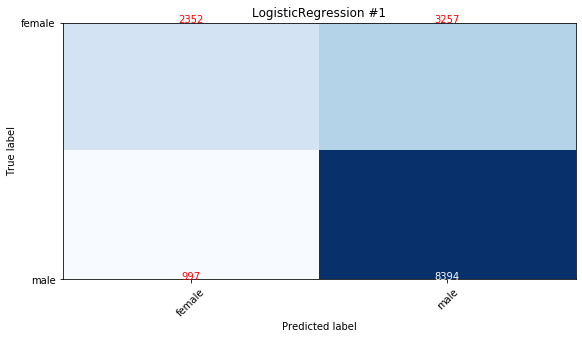

In [167]:
cm_df, y_LR_pred_test_round = plot_confusion_matrix(clf_LR, X_std_test, y_test, title='LogisticRegression #1')

–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–∫–ª–∞–¥—ã–≤–∞—é—Ç—Å—è –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `cm_df`:

In [87]:
cm_df

model    tn    fp    fn    tp
0  LogisticRegression #1  2321  3288  1068  8323

In [171]:
clf_report(y_LR_pred_test_round, y_test)

              precision    recall  f1-score   support

           0       0.70      0.42      0.53      5609
           1       0.72      0.89      0.80      9391

   micro avg       0.72      0.72      0.72     15000
   macro avg       0.71      0.66      0.66     15000
weighted avg       0.71      0.72      0.70     15000


Accuracy:  0.7164


#### –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤—Ä—É—á–Ω—É—é –∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ `GridSearchCV`:

In [154]:
from sklearn.model_selection import GridSearchCV, cross_val_score

#### —É–¥–∞–ª—è—é –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - —ç—Ç–æ —Å—Ç—Ä–æ–∫–∏ —Å 15 –ø–æ 27(–≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ)

In [155]:
len(LR_coefs[15:27]), X_std_train.shape

(12, (45000, 30))

In [156]:
# —É–¥–∞–ª—è—é –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - —ç—Ç–æ —Å—Ç—Ä–æ–∫–∏ —Å 15 –ø–æ 27(–≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ)
X2_std_train= np.delete(X_std_train, np.s_[15:27], axis=1)  
X2_std_train.shape

(45000, 18)

In [157]:
clf_LR2 = LogisticRegression(random_state=seed)
LR2_params = {'C': range(1,51,5)}


LR2_grid = GridSearchCV(clf_LR2, LR2_params, cv=10, n_jobs=-1, verbose=True)

In [158]:
LR2_grid.fit(X_std_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.0s finished
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': range(1, 51, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=True)

In [159]:
LR2_grid.best_params_, LR2_grid.best_score_

({'C': 1}, 0.7109111111111112)

#### –†–µ–∑—É–ª—å—Ç–∞—Ç –∏–∑–º–µ–Ω–∏–ª—Å—è...

## LinearSVC <a class="anchor" id="LinearSVC"></a>
[back to contents](#contents)

**An SVM model** is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.
Linear SVM is the newest extremely fast machine learning (data mining) algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear **support vector machine.**
It has many advantages, such as:

‚Ä¢Efficiency in dealing with extra large data sets (say, several millions training data pairs)

‚Ä¢Solution of multiclass classification problems with any number of classes

‚Ä¢Working with high dimensional data (thousands of features, attributes) in both sparse and dense format

‚Ä¢No need for expensive computing resources (personal computer is a standard platform)

In [100]:
from sklearn.svm import SVC

In [110]:
clf_svc = SVC(random_state=seed)

clf_svc.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=40,
  shrinking=True, tol=0.001, verbose=False)

Train ROC AUC: 0.6699
Test ROC AUC: 0.6766


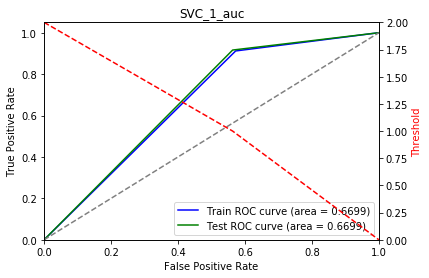

In [172]:
y_svm_pred_train, y_svm_pred_test = show_auc(clf_svc, X_std_train, y_train, X_std_test, y_test,
                                             'SVC_1_auc',only_predict=True)

Confusion matrix, without normalization


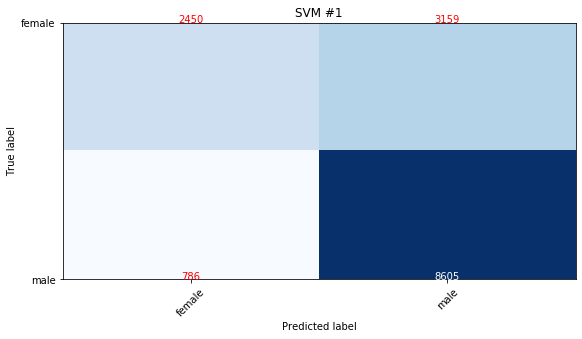

In [173]:
cm_svm, y_svm_pred_test_round = plot_confusion_matrix(clf_svc, X_std_test, y_test, title='SVM #1',only_predict=True)

In [174]:
cm_svm

model    tn    fp   fn    tp
0  SVM #1  2450  3159  786  8605

### –î–æ–±–∞–≤–ª—è–µ–º —Ä–µ—â—É–ª—å—Ç–∞—Ç—ã –æ—Ü–µ–Ω–∫–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∫ —Ç–∞–±–ª–∏—Ü–µ `cm_df`, –≤ –∫–æ—Ç–æ—Ä–æ–π –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ:

In [175]:
cm_df = cm_df.append(cm_svm, ignore_index=True)
cm_df

model    tn    fp   fn    tp
0  LogisticRegression #1  2352  3257  997  8394
1                 SVM #1  2450  3159  786  8605

In [176]:
clf_report(y_svm_pred_test_round, y_test)

              precision    recall  f1-score   support

           0       0.76      0.44      0.55      5609
           1       0.73      0.92      0.81      9391

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.74      0.68      0.68     15000
weighted avg       0.74      0.74      0.72     15000


Accuracy:  0.737


#### –ö–∞–∫ –≤–∏–¥–∏–º, SVM —á—É—Ç—å –ª—É—á—à–µ —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π.

# kNN (K-Nearest Neighbors)<a class="anchor" id="kNN"></a>

[back to contents](#contents)

 **Classifier implementing the k-nearest neighbors vote.**
 
 The method is considered fast in comparison, for example, with compositions of algorithms, but in real problems, as a rule, the number of neighbors used for classification will be large (100-150), and in this case the algorithm will not work as fast as the decision tree.
 
 If there are a lot of features in the data set, then it is difficult to find the appropriate weights and determine which features are not important for classification / regression.
 
 Dependence on the chosen metric of distance between examples. The default choice of Euclidean distance is most often not justified by anything. You can find a good solution by enumerating the parameters, but for a large data set, this is time-consuming.
 
 There is no theoretical basis for choosing a certain number of neighbors - just busting (however, most often this is true for all hyperparameters of all models). In the case of a small number of neighbors, the method is sensitive to outliers, that is, it tends to retrain;

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Now we build the **ROC curve**, a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The **ROC curve** is created by plotting the **true positive rate (TPR) against the false positive rate (FPR)** at various threshold settings. The true-positive rate is also known as **sensitivity, recall**. The false-positive rate is also known as probability of false alarm and can be calculated as **(1 ‚àí specificity)**.

**In this example we get probability of 1 (male) for test and train sets. We can see, that classifier worked better on train set than on test, as ROC AUC for train set is bigger (0.8094).** 

Train:
ROC AUC: 0.8094
Test:
ROC AUC: 0.5501


0.5501479495726138

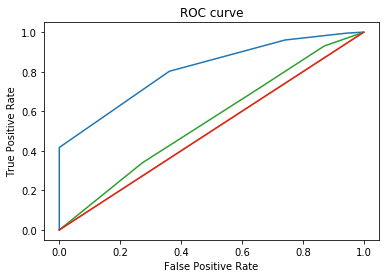

In [181]:
y_knn_pred_test = clf_knn.predict_proba(X_test)[:, 1]
y_knn_pred_train = clf_knn.predict_proba(X_train)[:, 1]

print('Train:')
show_auc(y_train, y_knn_pred_train, 'train')
         
print('Test:')
show_auc(y_test, y_knn_pred_test, 'test')

**Let's show the text report showing the main classification metrics for k-NN classifier.**

We see  precision, recall and F1-score for each class. In this case, male metrics are better than for female. K-NN classifier shows better result than previous. 

**The report includes macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise.**

In [182]:
y_knn_pred_test_round = np.around(y_knn_pred_test)
print(classification_report(y_test, y_knn_pred_test_round, target_names=target_names))

              precision    recall  f1-score   support

      female       0.32      0.13      0.18       903
        male       0.81      0.93      0.87      3646

   micro avg       0.77      0.77      0.77      4549
   macro avg       0.56      0.53      0.53      4549
weighted avg       0.71      0.77      0.73      4549



**From the confusion matrix we can see that the correct predictions (classification of doctors) was 117 for female and 3392 correct predictions for male doctors.**

Confusion matrix, without normalization
[[ 117  786]
 [ 254 3392]]


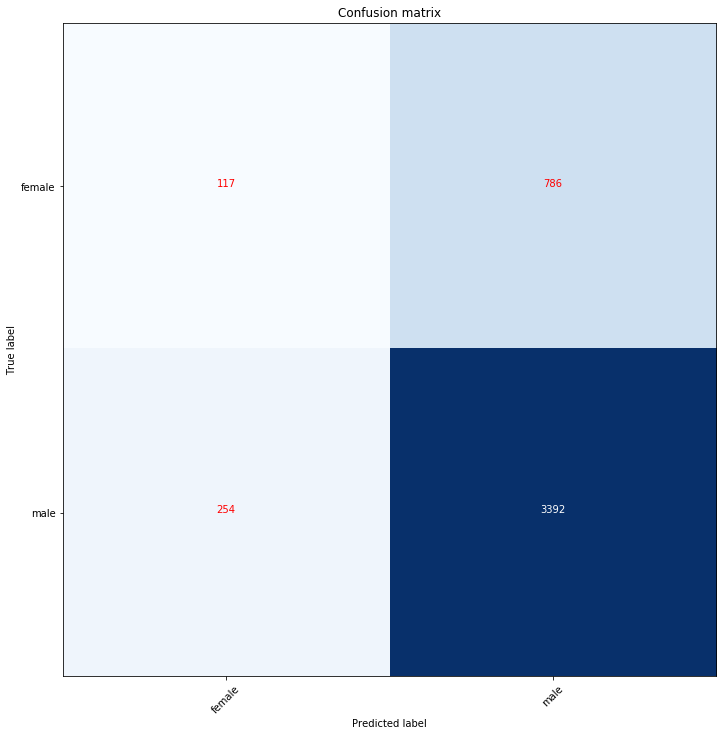

In [183]:
knn_cnf_matrix = confusion_matrix(y_test, y_knn_pred_test_round)

plt.figure(figsize=(10,12))


plot_confusion_matrix(knn_cnf_matrix, classes=['female', 'male'],
                      title='Confusion matrix')

plt.show()

In [184]:
accuracy_score(y_test, y_LR_pred_test_round)

0.801494834029457

In [185]:
X.shape, y.shape, y.value_counts()

((18196, 8), (18196,), 1    14424
 0     3772
 Name: male, dtype: int64)

**Using the following function, we find out how many neighbors for this model could reduce the classification error.**

**With values of K from 15 and above it is seen that the oscillations are not so large, but nevertheless they exist.**

In [224]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

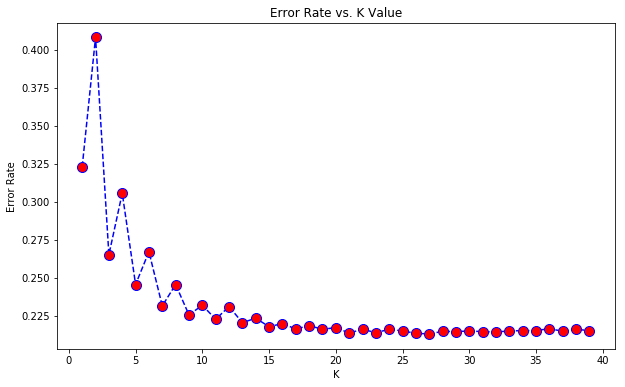

In [225]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [226]:
#Lets try take K = 22, and see how model will work in this case.
clf_knn = KNeighborsClassifier(n_neighbors=40, n_jobs=-1)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=40, p=2,
           weights='uniform')

**Test ROC AUC value improved slightly**

**Train ROC AUC value decreased**

Train:
ROC AUC: 0.6662
Test:
ROC AUC: 0.5870


0.586965896030223

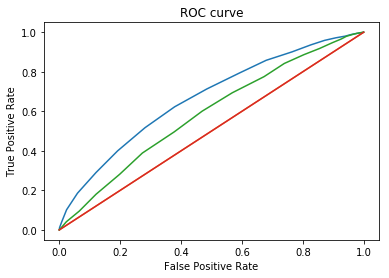

In [227]:
y_knn_pred_test = clf_knn.predict_proba(X_test)[:, 1]
y_knn_pred_train = clf_knn.predict_proba(X_train)[:, 1]

print('Train:')
show_auc(y_train, y_knn_pred_train, 'train')
         
print('Test:')
show_auc(y_test, y_knn_pred_test, 'test')

**F1-score value got worse for female**

In [228]:
y_knn_pred_test_round = np.around(y_knn_pred_test)
print(classification_report(y_test, y_knn_pred_test_round, target_names=target_names))

              precision    recall  f1-score   support

      female       0.55      0.01      0.02       978
        male       0.79      1.00      0.88      3571

   micro avg       0.79      0.79      0.79      4549
   macro avg       0.67      0.50      0.45      4549
weighted avg       0.74      0.79      0.70      4549



**From the confusion matrix we can see that the correct predictions (classification of doctors) was 11 for female and 3562 correct predictions for male doctors.**

Confusion matrix, without normalization
[[  11  967]
 [   9 3562]]


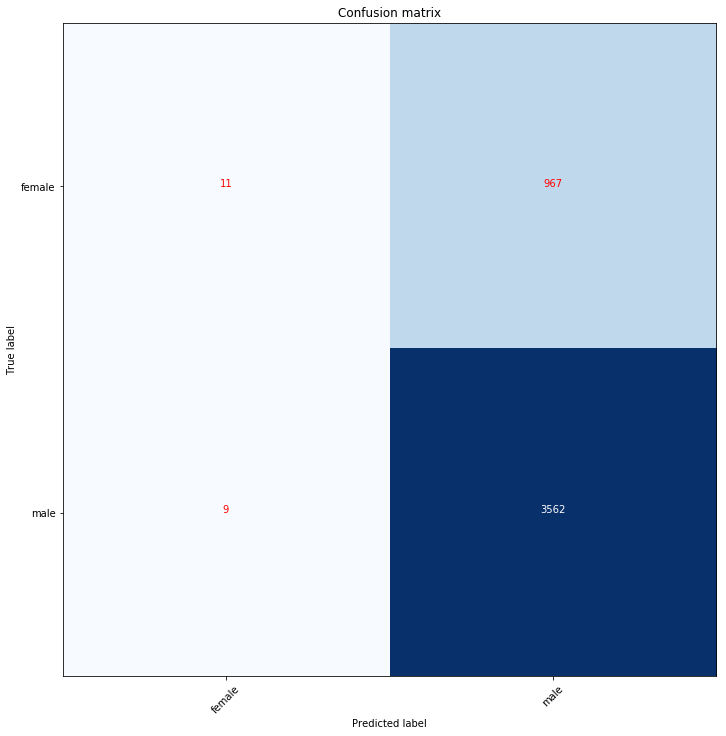

In [229]:
knn_cnf_matrix = confusion_matrix(y_test, y_knn_pred_test_round)

plt.figure(figsize=(10,12))


plot_confusion_matrix(knn_cnf_matrix, classes=['female', 'male'],
                      title='Confusion matrix')

plt.show()

### DecisionTreeClassifier<a class="anchor" id="dtc"></a>

[back to contents](#contents)

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [232]:
from sklearn.tree import DecisionTreeClassifier

clf_Tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4,
                              random_state=1)

clf_Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

**No metrics for female.**

In [233]:
y_Tree_pred = clf_Tree.predict(X_test)
print(classification_report(y_test, y_Tree_pred, target_names=['female','male']))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00       978
        male       0.78      1.00      0.88      3571

   micro avg       0.78      0.78      0.78      4549
   macro avg       0.39      0.50      0.44      4549
weighted avg       0.62      0.78      0.69      4549



**Here ROC AUC of train and test are close to each other.**

Train:
ROC AUC: 0.6981
Test:
ROC AUC: 0.6856


0.685586830746888

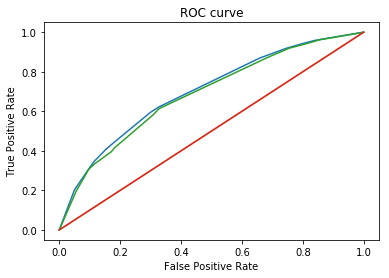

In [234]:
y_Tree_pred_test = clf_Tree.predict_proba(X_test)[:, 1]
y_Tree_pred_train = clf_Tree.predict_proba(X_train)[:, 1]

print('Train:')
show_auc(y_train, y_Tree_pred_train, 'train')
         
print('Test:')
show_auc(y_test, y_Tree_pred_test, 'test')

In [235]:
y_Tree_pred_test_round = np.around(y_Tree_pred_test)
accuracy_score(y_test, y_Tree_pred_test_round)

0.7847878654649374

**We will take certain features to build decision tree.**

In [239]:
features = list(X.columns.to_list())
features

['specialty',
 'brand_name_rx_count',
 'generic_rx_count',
 'region',
 'years_practicing',
 'urban',
 'bn_rx_proportion',
 'drugs_variety']

In [240]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf_Tree,
                           filled=True, 
                           rounded=True,
                           class_names=['female','male'],
                           feature_names=features, 
                           out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('tree1.png')

True

**Pictre shows that classifier builds tree with 4 nodes for class 'male' and different samples number. Each node has its own condition and if it is True or False, the model splits the tree into subtrees. Gini creates split points (entropy). 'Value' means how the sample is divided, in our case sample = [female_numbers, male_nmbers]. On the picture we can see, that classifier found two classes of female doctors.**

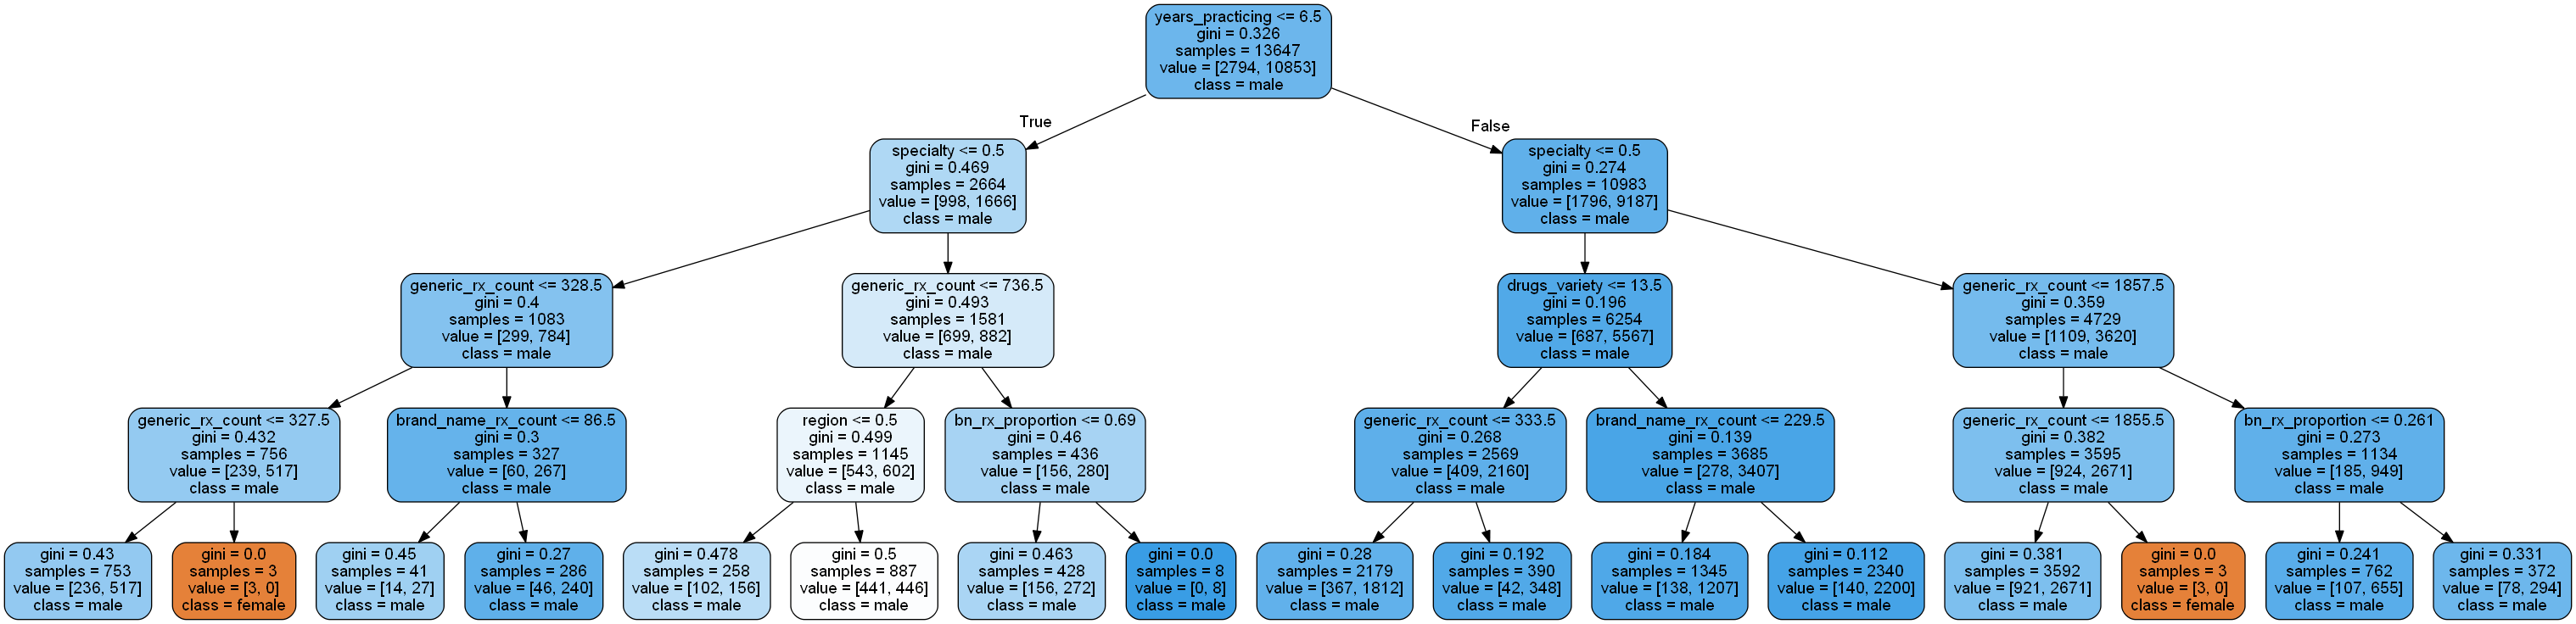

In [241]:
Image('tree1.png')

### Neural Network with [pytorch](https://pytorch.org/)

In [1]:
# –ø–æ—Å–ª–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞, –Ω–∞–∏—á–Ω–∏–∞—Ç—å —Å —ç—Ç–æ–≥–æ –º–µ—Ç—Å–∞
W_df = pd.read_csv('W_df.csv') 
W_df = W_df.set_index('npi')
W_df.head(2)

NameError: name 'pd' is not defined

In [128]:
X_w = W_df.iloc[:30000,1:-1]
y_w = W_df.iloc[:30000,-1]

In [129]:
X_w.shape

(30000, 31)

In [130]:
y_w.shape

(30000,)

In [131]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.20, stratify=y_w)

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F

–ü–µ—Ä–µ–≤–æ–¥–∏–º –≤—Ö–æ–¥—è—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ç–∏–ø `numpy.ndarray` - —Ç–µ–Ω–∑–æ—Ä, —Ç–∫ —Å –Ω–∏–º —Ä–∞–±–æ—Ç–∞–µ—Ç **pytorch**

In [133]:
X_w_train = X_w_train.to_numpy()
y_w_train = y_w_train.to_numpy()

–°–æ–∑–¥–∞–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º —Å–µ—Ç–∏:

* `n_input` - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏—á–µ–π –Ω–∞ –≤—Ö–æ–¥–µ
* `n_hidden` - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–µ—Ä—Å–µ–ø—Ç—Ä–æ–Ω–æ–≤ –≤ —Å–∫—Ä—ã—Ç–æ–º —Å–ª–æ–µ
* `n_output` - –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –≤—ã—Ö–æ–¥–µ

In [134]:
n_input = X.shape[1] # Number of inputs

# Layer size
n_hidden = 8 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

In [135]:
n_input

31

–¥–∞–ª–µ–µ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –ø–µ—Ä–µ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö –º–µ–∂–¥—É —Å–ª–æ—è–º–∏:

* [` nn.Linear()`](https://pytorch.org/docs/stable/nn.html#linear)
* [`nn.ELU()`](https://pytorch.org/docs/stable/nn.html#elu)
* [`nn.Sigmoid()`](https://pytorch.org/docs/stable/nn.html#sigmoid)

In [136]:
# Build network
clf_NN = nn.Sequential(
    nn.Linear(n_input, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(clf_NN)

Sequential(
  (0): Linear(in_features=31, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)


–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å [`nn.BCELoss()`](https://pytorch.org/docs/stable/nn.html#bceloss), —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ ‚Äî –±–µ—Ä–µ–º [Adam](https://arxiv.org/abs/1412.6980), –º–æ–∂–Ω–æ –ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã, —É–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –≤ [pytorch](https://pytorch.org/docs/stable/optim.html#algorithms).

In [137]:
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(clf_NN.parameters(), lr=learning_rate)

In [140]:
def run_clf_NN(X, y, clf_NN=clf_NN, epochs=500, loss_func=loss_func, lr=learning_rate, optimizer=optimizer):

    loss_list = []
    accuracy_list = []
    y_pred_list = []
    
    y_t = torch.FloatTensor(y).reshape(-1, 1)

    for e in range(epochs):
        X_t = torch.FloatTensor(X)
        y_hat = clf_NN(X_t)
        loss = loss_func(y_hat, y_t)

        # –≤—ã—á–∏—Å–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏/–æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è    
        loss.backward()
        # –¥–∞–ª–µ–µ —Ñ—É–Ω–∫—Ü–∏ optimizer.step() –æ–±–Ω–æ–≤–ª—è–µ—Ç –≤–µ—Å–∞ –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –≤—ã—è–≤–ª–µ–Ω–Ω—É—é –æ—à–∏–±–∫—É  
        optimizer.step()
        optimizer.zero_grad()
        y_hat_class = np.where(y_hat.detach().numpy()<0.5, 0, 1)
        accuracy = np.sum(y_w_train.reshape(-1,1)==y_hat_class) / len(y_w_train)
        
        # –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ    
        y_pred_list.append(y_hat_class)
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())
        
        
    return y_pred_list, accuracy_list, loss_list

In [141]:
def plot_NN_study(plot_name, loss_list, accuracy_list):
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    ax[0].plot(loss_list)
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Accuracy through the epochs')

    ax[1].plot(accuracy_list)
    ax[1].set_ylabel('Classification Accuracy')
    ax[1].set_title('Accuracy through the epochs')
    plt.tight_layout()
    
    plt.savefig(f'{plot_name}.tiff', transparent=False, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

In [142]:
y_pred_list, accuracy_list, loss_list = run_clf_NN(X_w_train, y_w_train, epochs=800)

In [147]:
len(y_pred_list[-1])

24000

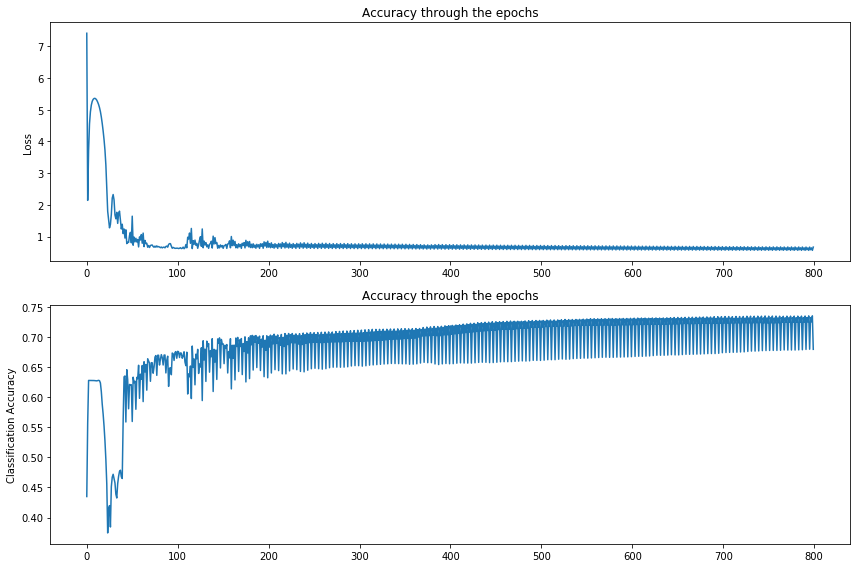

In [146]:
plot_NN_study('study_clf_NN', loss_list, accuracy_list)

In [149]:
accuracy_list[-2]

0.735375

## –ê–Ω—Å–∞–º–±–ª–∏ <a class="anchor" id="ensembles"></a>

[back to contents](#contents)

### –¢–µ–æ—Ä–µ–º–∞ –ö–æ–Ω–¥–æ—Ä—Å–µ ¬´–æ –∂—é—Ä–∏ –ø—Ä–∏—Å—è–∂–Ω—ã—Ö¬ª (1784).
–ï—Å–ª–∏ –∫–∞–∂–¥—ã–π —á–ª–µ–Ω –∂—é—Ä–∏ –ø—Ä–∏—Å—è–∂–Ω—ã—Ö –∏–º–µ–µ—Ç –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–µ –º–Ω–µ–Ω–∏–µ, –∏ –µ—Å–ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è —á–ª–µ–Ω–∞ –∂—é—Ä–∏ –±–æ–ª—å—à–µ 0.5, —Ç–æ —Ç–æ–≥–¥–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–∏—Å—è–∂–Ω—ã—Ö –≤ —Ü–µ–ª–æ–º –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —á–ª–µ–Ω–æ–≤ –∂—é—Ä–∏ –∏ —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ –µ–¥–∏–Ω–∏—Ü–µ. –ï—Å–ª–∏ –∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –±—ã—Ç—å –ø—Ä–∞–≤—ã–º —É –∫–∞–∂–¥–æ–≥–æ –∏–∑ —á–ª–µ–Ω–æ–≤ –∂—é—Ä–∏ –º–µ–Ω—å—à–µ 0.5, —Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω—è—Ç–∏—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–∏—Å—è–∂–Ω—ã–º–∏ –≤ —Ü–µ–ª–æ–º –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –∏ —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ –Ω—É–ª—é —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏—Å—è–∂–Ω—ã—Ö.


$N$ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏—Å—è–∂–Ω—ã—Ö

$p$ ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –ø—Ä–∏—Å—è–∂–Ω–æ–≥–æ

$Œº$‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –≤—Å–µ–≥–æ –∂—é—Ä–∏

$m$ ‚Äî –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —á–ª–µ–Ω–æ–≤ –∂—é—Ä–∏, $m = \text{floor}(N/2) + 1$

$C^i_N$ - —á–∏—Å–ª–æ —Å–æ—á–µ—Ç–∞–Ω–∏–π –∏–∑ $N$ –ø–æ $i$

$$\large \mu = \sum_{i=m}^{N}C_N^ip^i(1-p)^{N-i}$$

–ï—Å–ª–∏ $p>0.5$, —Ç–æ $\mu>p$

–ï—Å–ª–∏ $N \rightarrow \infty$, —Ç–æ $\mu \rightarrow 1$

### RandomForestClassifier<a class="anchor" id="rfc"></a>

[back to contents](#contents)


**A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).**

In [242]:
from sklearn.ensemble import RandomForestClassifier

Feature ranking:
1. generic_rx_count (0.263090)
2. bn_rx_proportion (0.204383)
3. brand_name_rx_count (0.197700)
4. drugs_variety (0.153522)
5. years_practicing (0.073755)
6. region (0.054090)
7. specialty (0.032443)
8. urban (0.021016)


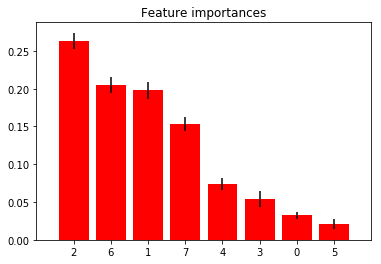

In [243]:
clf_RF = RandomForestClassifier(n_estimators=250,
                              random_state=10,
                              n_jobs=-1)

clf_RF.fit(X_train, y_train)
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [244]:
y_RF_pred = clf_RF.predict(X_test)
print(classification_report(y_test, y_RF_pred, target_names=['female','male']))

              precision    recall  f1-score   support

      female       0.37      0.12      0.19       978
        male       0.80      0.94      0.86      3571

   micro avg       0.77      0.77      0.77      4549
   macro avg       0.58      0.53      0.52      4549
weighted avg       0.71      0.77      0.72      4549



In [245]:
y_RF_pred_test_round = np.around(y_RF_pred)
accuracy_score(y_test, y_RF_pred_test_round)

0.7667619256979556

# Bagging

<a class="anchor" id="bagging"></a>

[back to contents](#contents)


–ë–µ–≥–≥–∏–Ω–≥ - –æ–±—â–∏–π –ø–æ–¥—Ö–æ–¥ –∫ —É–º–µ–Ω—å—à–µ–Ω–∏—é –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –ë–µ–≥–≥–∏–Ω–≥ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ—Ç —Ñ—Ä–∞–∑—ã bootstrap aggregation. Bootstrap –≤—ã–±–æ—Ä–∫–∞ - —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –≤—ã–±–æ—Ä–∫–∞ —Å –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–µ–º.

In [153]:
HTML('<img src="https://habrastorage.org/getpro/habr/post_images/198/14a/3f7/19814a3f7efaa3b7d1a3f8ab35889832.jpg">')

In [180]:
# –ø–æ—Å–ª–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞, –Ω–∞–∏—á–Ω–∏–∞—Ç—å —Å —ç—Ç–æ–≥–æ –º–µ—Ç—Å–∞
W_df = pd.read_csv('W_df.csv') 
W_df = W_df.set_index('npi')
X_w = W_df.iloc[:30000,1:-1]
y_w = W_df.iloc[:30000,-1]

In [181]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.20, stratify=y_w)

In [182]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(n_estimators=20, base_estimator=clf_LR, n_jobs=-1)
bag_clf.fit(X_w_train, y_w_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [184]:
y_pred_test = bag_clf.predict_proba(X_w_test)[:, 1]
y_pred_train = bag_clf.predict_proba(X_w_train)[:, 1]

In [ ]:
cm_bag, plot_confusion_matrix(bag_clf, X_w_test, y_w_test, title='_____')

In [193]:
y_LR_pred_train, y_LR_pred_test = show_auc(bag_clf, X_w_train, y_w_train, X_w_test, y_w_test, title='Bagging_AUC')

TypeError: show_auc() got an unexpected keyword argument 'title'

Train ROC AUC: 0.7450
Test ROC AUC: 0.7383


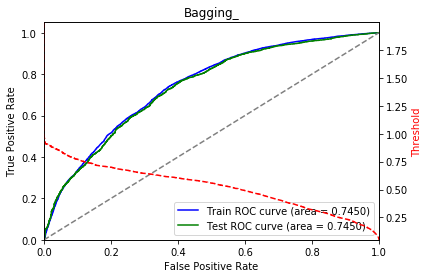

(array([0.71588949, 0.69714276, 0.54538185, ..., 0.75490625, 0.88718005,
        0.47032193]),
 array([0.75149909, 0.80234623, 0.75444013, ..., 0.62980017, 0.55761373,
        0.37817787]))

In [192]:
show_auc(bag_clf, X_w_train, y_w_train, X_w_test, y_w_test, 'Bagging_')

In [ ]:
def show_auc(clf, X_train, y_train, X_test, y_test, plot_name, only_predict=False): 
    


def clf_report(y_pred_test_round, y_test, target_names=target_names): 
    
    print(classification_report(y_test, y_pred_test_round))
    
    print('\nAccuracy: ', accuracy_score(y_test, y_pred_test_round))

## Stacked Ensembles

<a class="anchor" id="blending"></a>

[back to contents](#contents)


–ì–ª–∞–≤–Ω–∞—è –∏–¥–µ—è - –ø–æ—á–µ–º—É –∞–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –¥–µ–ª–∞–µ—Ç—Å—è —Ç–∞–∫–∏–º –ø—Ä–æ—Å—Ç—ã–º —Å–ø–æ—Å–æ–±–æ–º, –∫–∞–∫ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ? –ß—Ç–æ –µ—Å–ª–∏ –¥–æ–≤–µ—Ä–∏—Ç—å —ç—Ç–æ –¥–µ–ª–æ–º—É –¥—Ä—É–≥–æ–º—É –∞–ª–≥–æ—Ä–∏—Ç–º—É –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è?

### Blending

–ü—Ä–æ—Å—Ç–µ–π—à–∞—è —Å—Ö–µ–º–∞ —Å—Ç–µ–∫–∏–Ω–≥–∞ ‚Äî –±–ª–µ–Ω–¥–∏–Ω–≥ (Blending): –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –¥–µ–ª—è—Ç –Ω–∞ –¥–≤–µ —á–∞—Å—Ç–∏. –ù–∞ –ø–µ—Ä–≤–æ–π –æ–±—É—á–∞—é—Ç –±–∞–∑–æ–≤—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã. –ó–∞—Ç–µ–º –ø–æ–ª—É—á–∞—é—Ç –∏—Ö –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≤—Ç–æ—Ä–æ–π —á–∞—Å—Ç–∏ –∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ  –æ—Ç–≤–µ—Ç –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ (—Ç.–Ω. ¬´–º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫¬ª). –ù–∞ –º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –≤—Ç–æ—Ä–æ–π —á–∞—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—é—Ç –º–µ—Ç–∞–∞–ª–≥–æ—Ä–∏—Ç–º. –ó–∞—Ç–µ–º –∑–∞–ø—É—Å–∫–∞—é—Ç –µ–≥–æ –Ω–∞ –º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Ç–µ—Å—Ç–∞ –∏ –ø–æ–ª—É—á–∞—é—Ç –æ—Ç–≤–µ—Ç.


–û—Å–Ω–æ–≤–Ω–æ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ - –¥–µ–ª–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏. –ù–∏–∫–∞–∫–æ–π –∏–∑ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

<img src="stacking.png" style="max-width: 680px; display: inline" />



## Stacking

<a class="anchor" id="stack"></a>

[back to contents](#contents)

–í—ã–±–æ—Ä–∫—É —Ä–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ —Ñ–æ–ª–¥—ã, –∑–∞—Ç–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º —Ñ–æ–ª–¥—ã –∏ –æ–±—É—á–∞–µ–º –±–∞–∑–æ–≤—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –Ω–∞ –≤—Å–µ—Ö —Ñ–æ–ª–¥–∞—Ö, –∫—Ä–æ–º–µ –æ–¥–Ω–æ–≥–æ, –∞ –Ω–∞ –æ—Å—Ç–∞–≤—à–µ–º—Å—è –ø–æ–ª—É—á–∞–µ–º –æ—Ç–≤–µ—Ç—ã –±–∞–∑–æ–≤—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –∏ —Ç—Ä–∞–∫—Ç—É–µ–º –∏—Ö –∫–∞–∫ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —ç—Ç–æ–º —Ñ–æ–ª–¥–µ. –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –º–µ—Ç–∞–ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –±–∞–∑–æ–≤—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –æ–±—É—á–∞—é—Ç –Ω–∞ –≤—Å–µ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –∏ –±–µ—Ä—É—Ç –∏—Ö –æ—Ç–≤–µ—Ç—ã –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π.

<img src="stacking-2b.png" style="max-width: 680px; display: inline" />

In [ ]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    
    # –º–∞—Å—Å–∏–≤—ã –¥–ª—è –æ—Ç–≤–µ—Ç–æ–≤ –±–∞–∑–æ–≤—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ 
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        
        # –æ—Ç–≤–µ—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ –Ω–∞ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Å–ª–µ –∏–¥—É—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏
        meta_train[test_ind] = clf.predict_proba(X_train.iloc[test_ind])[:, 1]
        
        # –æ—Ç–ª–æ–∂–µ–Ω–Ω–∞—è –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –æ—Ç–≤–µ—Ç—ã –±–∞–∑–æ–≤—ã–º–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞–º–∏ –Ω–∏–∂–µ –º—ã –∏—Ö —É—Å—Ä–µ–¥–Ω–∏–º
        meta_test += clf.predict_proba(X_test)[:, 1]
    
    return meta_train, meta_test / stack_cv.n_splits

In [ ]:
from sklearn.model_selection import StratifiedKFold

# —Ä–∞–∑–±–∏–≤–∞–µ–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ 10 —á–∞—Å—Ç–µ–π
stack_cv = StratifiedKFold(n_splits=10, random_state=seed)

meta_train = []
meta_test = []
col_names = []

# –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –æ—Ç–≤–µ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤
print('LR features...')
meta_tr, meta_te = get_meta_features(clf_LR, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('RF features...')
meta_tr, meta_te = get_meta_features(clf_RF, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

In [ ]:
# —Å–æ–±–∏—Ä–∞–µ–º –¥–∞–Ω–Ω—ã–µ
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [ ]:
# –∑–∞–ø—É—Å–∫–∞–µ–º –º–µ—Ç–∞ –∞–ª–≥–æ—Ä–∏—Ç–º
clf_lr_meta = LogisticRegression(penalty='l2', C=1)
clf_lr_meta.fit(X_meta_train, y_train)

In [ ]:
y_pred_meta_test = clf_lr_meta.predict_proba(X_meta_test)[:, 1]